# GDP GROWTH PREDICTION <BR>
##AKSHITA SAXENA <BR>
### RESEARCH 2022

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***DATA & LIBRARIES LOADING*** 

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from fbprophet import Prophet
import datetime

In [232]:
#MASTER DATA WITH GDP GROWTH 1980-2022
data = pd.read_excel(r'/content/drive/MyDrive/Research_2022/gdp_growth.xlsx')
data.shape

(43, 7)

In [233]:
data['Year'] = data.Year.astype('int32')
data['Year'] = pd.to_datetime(data.Year,format='%Y')
#data['Year'] = pd.DatetimeIndex(data['Year']).year
data.reset_index(drop=True, inplace=True)
data.head()

,Year,France,India,Japan,United Kingdom,United States,Canada
0,1980-01-01,1.578745,6.735822,2.817591,-2.031368,-0.256750,2.163
1,1981-01-01,1.069020,6.006204,4.209336,-0.787744,2.537719,3.503
2,1982-01-01,2.505397,3.475733,3.312457,1.994891,-1.802887,-3.187
3,1983-01-01,1.240865,7.288893,3.523045,4.221856,4.583913,2.601
4,1984-01-01,1.513722,3.820738,4.501995,2.269105,7.236633,5.908


In [234]:
#SUBSET DATA FOR ALL COUNTRIES FROM 1980-2018
data_train = data[data['Year']<='2018-01-01']
data_train.shape

(39, 7)

In [235]:
#SUBSET DATA FOR ALL COUNTRIES FROM 2019-2022
data_test = data[data['Year']>'2018-12-31']
data_test.shape

(4, 7)

In [236]:
data_test.reset_index(drop=True, inplace=True)
data_test

,Year,France,India,Japan,United Kingdom,United States,Canada
0,2019-01-01,1.842972,4.041554,0.270305,1.671944,2.161177,1.861
1,2020-01-01,-7.855256,-7.251755,-4.585508,-9.396160,-3.404592,-5.313
2,2021-01-01,6.293000,9.497000,2.358000,6.763000,5.973000,5.688
3,2022-01-01,3.931000,8.523000,3.199000,5.013000,5.198000,4.889


# ***PROPHET***


#### **Data Prep**

##### India

In [238]:
india_train = data_train[['Year','India']]
india_test = data_test[['Year','India']]
india_train.columns,india_test.columns = ['ds','y'],['ds','y']

##### Japan

In [267]:
japan_train = data_train[['Year','Japan']]
japan_test = data_test[['Year','Japan']]
japan_train.columns,japan_test.columns = ['ds','y'],['ds','y']

##### United Kingdom

In [276]:
uk_train = data_train[["Year",'United Kingdom']]
uk_test = data_test[["Year",'United Kingdom']]
uk_train.columns,uk_test.columns = ['ds','y'],['ds','y']

##### France

In [252]:
france_train = data_train[['Year','France']]
france_test = data_test[['Year','France']]
france_train.columns,france_test.columns = ['ds','y'],['ds','y']
france_train.head()

,ds,y
0,1980-01-01,1.578745
1,1981-01-01,1.069020
2,1982-01-01,2.505397
3,1983-01-01,1.240865
4,1984-01-01,1.513722


##### United States

In [240]:
us_train = data_train[['Year','United States']]
us_test = data_test[['Year','United States']]
us_train.columns,us_test.columns = ['ds','y'],['ds','y']

##### Canada

In [243]:
canada_train = data_train[['Year','Canada']]
canada_test = data_test[['Year','Canada']]
canada_train.columns,canada_test.columns = ['ds','y'],['ds','y']

#### **Prophet Model**

##### India

In [279]:
# define the model
model = Prophet()
# fit the model
model.fit(india_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [245]:
# use the model to make a forecast in sample
forecast = model.predict(india_test)

In [246]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2019-01-01  7.311633    5.124811    9.480429
1 2020-01-01  7.463182    5.269868    9.587328
2 2021-01-01  7.188833    4.961276    9.579633
3 2022-01-01  7.366704    5.161521    9.541145


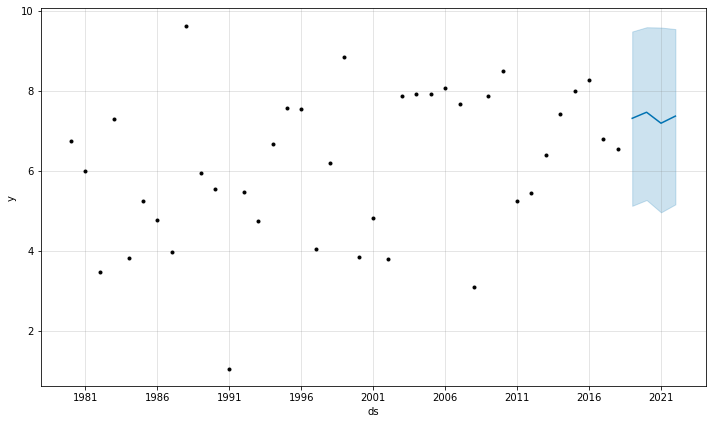

In [247]:
# plot forecast
model.plot(forecast)
plt.show()

In [248]:
# use the model to make a forecast in sample
forecast_in = model.predict(india_train)

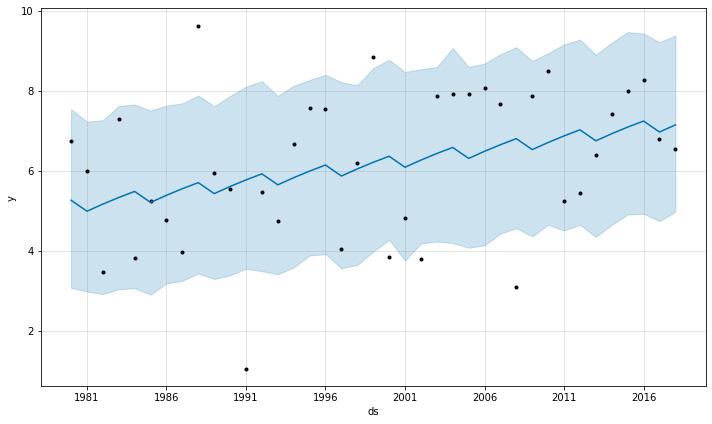

In [249]:
# plot forecast
model.plot(forecast_in)
plt.show()

MAE: 1.431


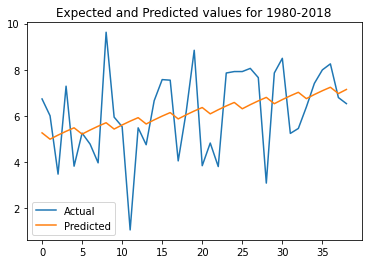

In [250]:
# calculate MAE between expected and predicted values for 1980-2018
from sklearn.metrics import mean_absolute_error
y_true = india_train['y'].values
y_pred = forecast_in['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 1980-2018")
plt.legend()
plt.show()

MAE: 5.362


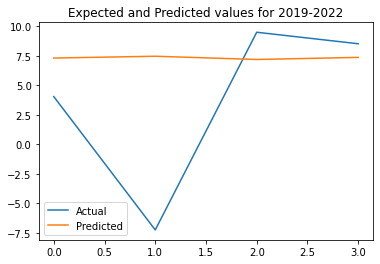

In [251]:
# calculate MAE between expected and predicted values for 2019-2022
from sklearn.metrics import mean_absolute_error
y_true = india_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 2019-2022")
plt.legend()
plt.show()

##### France

In [281]:
# define the model
model = Prophet()
# fit the model
model.fit(france_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [282]:
# use the model to make a forecast in sample
forecast = model.predict(france_test)

In [283]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2019-01-01  1.301702   -0.339450    2.961865
1 2020-01-01  1.407647   -0.284471    2.929559
2 2021-01-01  0.892054   -0.707905    2.524680
3 2022-01-01  1.048926   -0.620913    2.635241


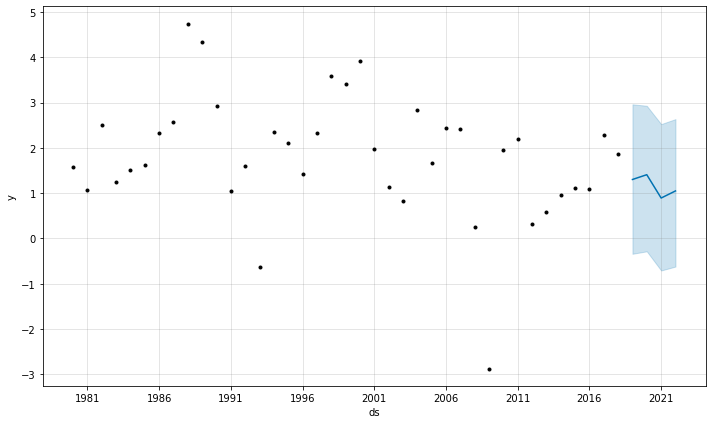

In [284]:
# plot forecast
model.plot(forecast)
plt.show()

In [285]:
# use the model to make a forecast in sample
forecast_in = model.predict(france_train)

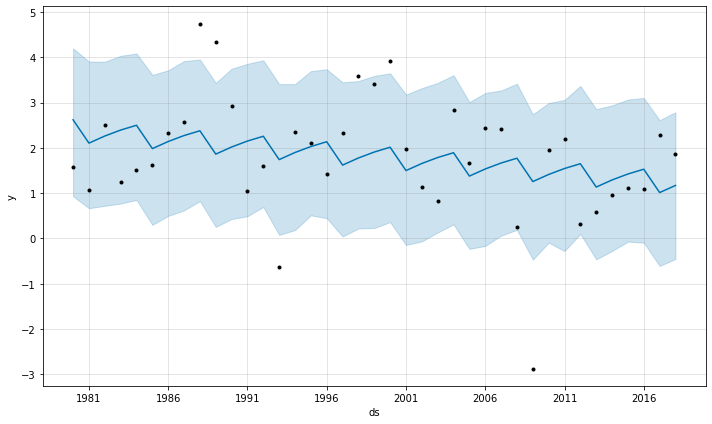

In [286]:
# plot forecast
model.plot(forecast_in)
plt.show()

MAE: 1.001


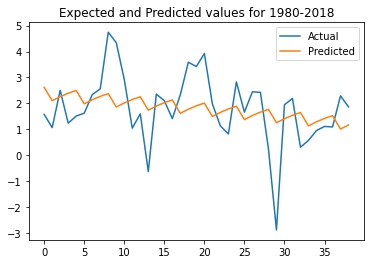

In [287]:
# calculate MAE between expected and predicted values for 1980-2018
from sklearn.metrics import mean_absolute_error
y_true = france_train['y'].values
y_pred = forecast_in['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 1980-2018")
plt.legend()
plt.show()

MAE: 4.522


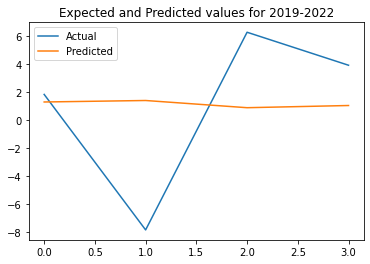

In [288]:
# calculate MAE between expected and predicted values for 2019-2022
from sklearn.metrics import mean_absolute_error
y_true = france_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 2019-2022")
plt.legend()
plt.show()

##### Japan

In [289]:
# define the model
model = Prophet()
# fit the model
model.fit(japan_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [290]:
# use the model to make a forecast in sample
forecast = model.predict(japan_test)

In [291]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2019-01-01 -0.150538   -2.570070    2.059957
1 2020-01-01 -0.011419   -2.297383    2.287326
2 2021-01-01 -0.889433   -3.199871    1.466624
3 2022-01-01 -0.737496   -2.983007    1.685871


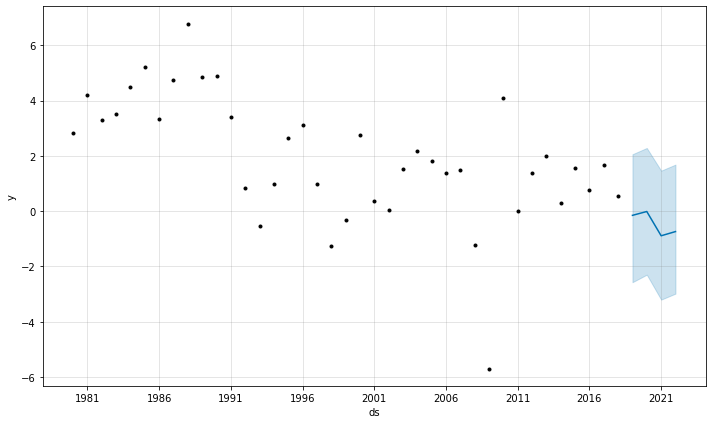

In [292]:
# plot forecast
model.plot(forecast)
plt.show()

In [293]:
# use the model to make a forecast in sample
forecast_in = model.predict(japan_train)

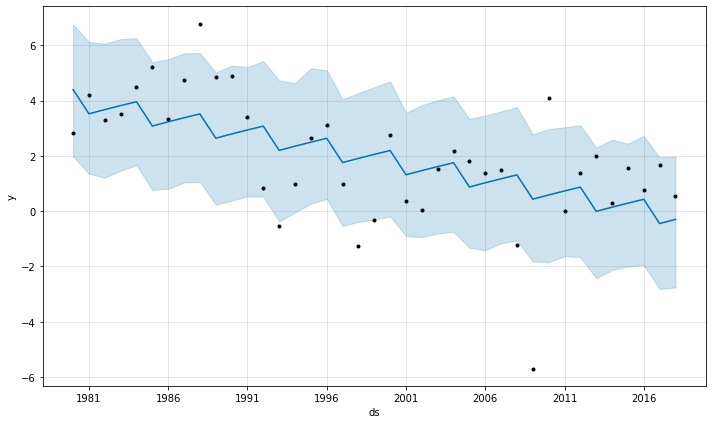

In [294]:
# plot forecast
model.plot(forecast_in)
plt.show()

MAE: 1.373


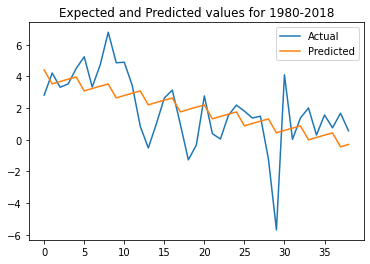

In [295]:
# calculate MAE between expected and predicted values for 1980-2018
from sklearn.metrics import mean_absolute_error
y_true = japan_train['y'].values
y_pred = forecast_in['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 1980-2018")
plt.legend()
plt.show()

MAE: 3.045


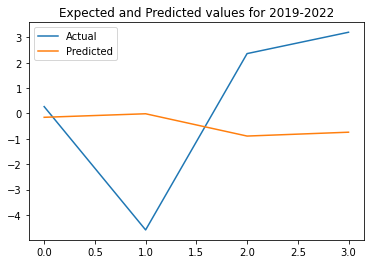

In [296]:
# calculate MAE between expected and predicted values for 2019-2022
from sklearn.metrics import mean_absolute_error
y_true = japan_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 2019-2022")
plt.legend()
plt.show()

##### United Kingdom

In [299]:
# define the model
model = Prophet()
# fit the model
model.fit(uk_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [300]:
# use the model to make a forecast in sample
forecast = model.predict(uk_test)

In [301]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2019-01-01  1.878559   -0.645415    4.240253
1 2020-01-01  1.860668   -0.470149    4.192295
2 2021-01-01  1.778150   -0.626740    4.237764
3 2022-01-01  1.811328   -0.562772    4.323086


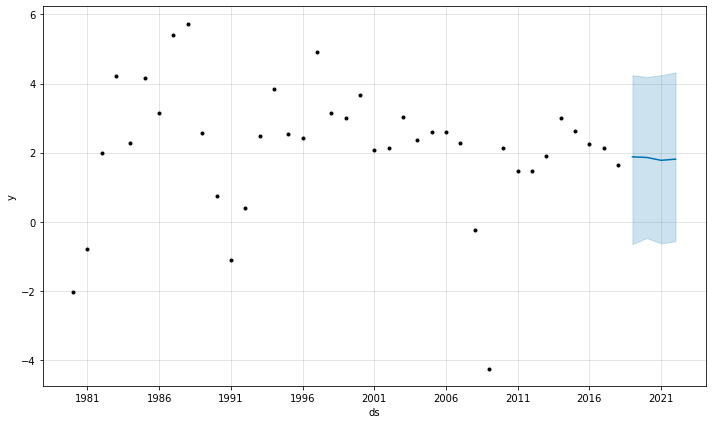

In [302]:
# plot forecast
model.plot(forecast)
plt.show()

In [303]:
# use the model to make a forecast in sample
forecast_in = model.predict(uk_train)

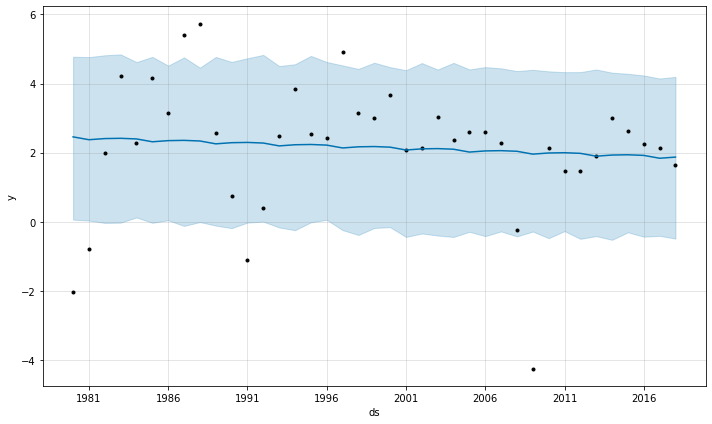

In [304]:
# plot forecast
model.plot(forecast_in)
plt.show()

MAE: 1.270


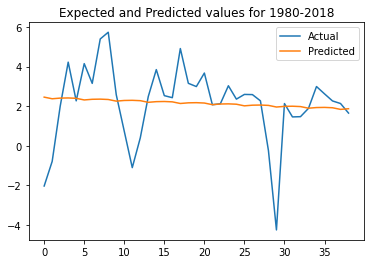

In [305]:
# calculate MAE between expected and predicted values for 1980-2018
from sklearn.metrics import mean_absolute_error
y_true = uk_train['y'].values
y_pred = forecast_in['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 1980-2018")
plt.legend()
plt.show()

MAE: 4.912


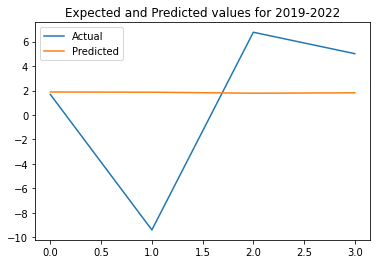

In [306]:
# calculate MAE between expected and predicted values for 2019-2022
from sklearn.metrics import mean_absolute_error
y_true = uk_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 2019-2022")
plt.legend()
plt.show()

##### United States

In [307]:
# define the model
model = Prophet()
# fit the model
model.fit(us_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [308]:
# use the model to make a forecast in sample
forecast = model.predict(us_test)

In [309]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2019-01-01  2.191313   -0.237516    4.491000
1 2020-01-01  2.376164    0.113262    4.593894
2 2021-01-01  1.710930   -0.577233    4.062931
3 2022-01-01  1.893715   -0.398359    4.164645


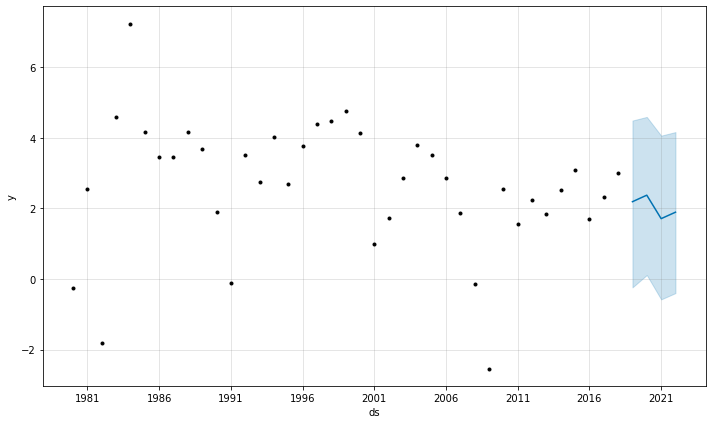

In [310]:
# plot forecast
model.plot(forecast)
plt.show()

In [311]:
# use the model to make a forecast in sample
forecast_in = model.predict(us_train)

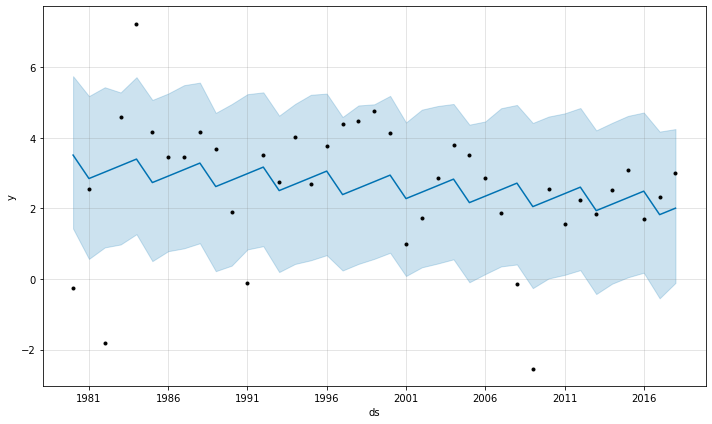

In [312]:
# plot forecast
model.plot(forecast_in)
plt.show()

MAE: 1.296


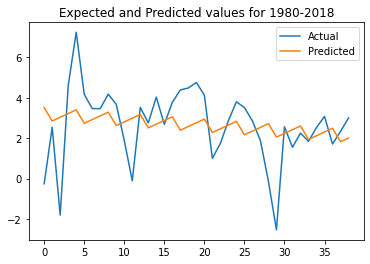

In [313]:
# calculate MAE between expected and predicted values for 1980-2018
from sklearn.metrics import mean_absolute_error
y_true = us_train['y'].values
y_pred = forecast_in['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 1980-2018")
plt.legend()
plt.show()

MAE: 3.344


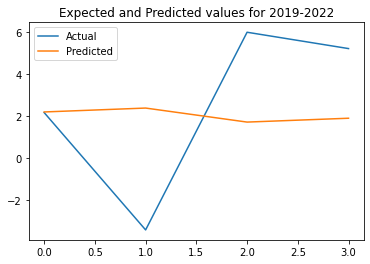

In [314]:
# calculate MAE between expected and predicted values for 2019-2022
from sklearn.metrics import mean_absolute_error
y_true = us_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 2019-2022")
plt.legend()
plt.show()

##### Canada

In [315]:
# define the model
model = Prophet()
# fit the model
model.fit(canada_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [316]:
# use the model to make a forecast in sample
forecast = model.predict(canada_test)

In [317]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2019-01-01  2.113910   -0.394841    4.619863
1 2020-01-01  2.175340   -0.282410    4.631766
2 2021-01-01  1.959966   -0.541852    4.529840
3 2022-01-01  1.999950   -0.401416    4.468293


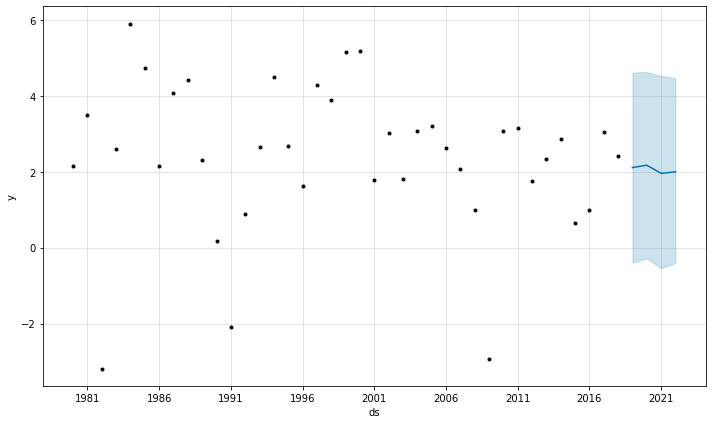

In [318]:
# plot forecast
model.plot(forecast)
plt.show()

In [319]:
# use the model to make a forecast in sample
forecast_in = model.predict(canada_train)

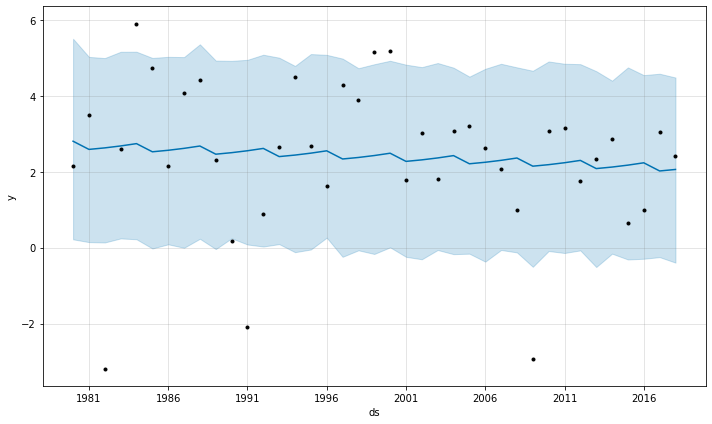

In [320]:
# plot forecast
model.plot(forecast_in)
plt.show()

MAE: 1.424


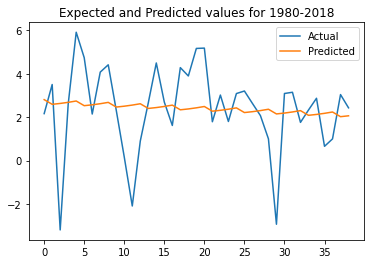

In [321]:
# calculate MAE between expected and predicted values for 1980-2018
from sklearn.metrics import mean_absolute_error
y_true = canada_train['y'].values
y_pred = forecast_in['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 1980-2018")
plt.legend()
plt.show()

MAE: 3.590


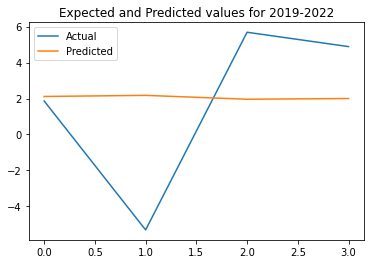

In [322]:
# calculate MAE between expected and predicted values for 2019-2022
from sklearn.metrics import mean_absolute_error
y_true = canada_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Expected and Predicted values for 2019-2022")
plt.legend()
plt.show()

# ***RNN-MODEL***

### **Data Prep**

#### India

In [109]:
country = 'India'

In [110]:
x_train = np.array(data_train[['India']])
x_test = data_test[['India']]

In [111]:
x_train

array([[6.73582153],
       [6.00620362],
       [3.47573324],
       [7.2888929 ],
       [3.82073786],
       [5.25429922],
       [4.77656417],
       [3.96535563],
       [9.62778292],
       [5.94734333],
       [5.53345456],
       [1.05683143],
       [5.48239602],
       [4.75077622],
       [6.65892407],
       [7.57449184],
       [7.54952225],
       [4.04982085],
       [6.18441582],
       [8.84575556],
       [3.84099116],
       [4.82396626],
       [3.80397532],
       [7.86038148],
       [7.92293661],
       [7.92343062],
       [8.06073257],
       [7.66081507],
       [3.08669806],
       [7.86188883],
       [8.4975847 ],
       [5.241315  ],
       [5.45638875],
       [6.3861064 ],
       [7.41022761],
       [7.99625379],
       [8.2563055 ],
       [6.79538342],
       [6.53298901]])

In [112]:
x_test

,India
0,4.041554
1,-7.251755
2,9.497000
3,8.523000


#### France

In [180]:
country = 'France'

In [181]:
x_train = np.array(data_train[['France']])
x_test = data_test[['France']]

In [182]:
x_train

array([[ 1.57874526],
       [ 1.06901984],
       [ 2.50539662],
       [ 1.24086486],
       [ 1.5137216 ],
       [ 1.62278137],
       [ 2.33727635],
       [ 2.56190033],
       [ 4.74314219],
       [ 4.34386106],
       [ 2.92393508],
       [ 1.04817585],
       [ 1.59934268],
       [-0.62866635],
       [ 2.35834218],
       [ 2.10669525],
       [ 1.41299367],
       [ 2.33629653],
       [ 3.58865943],
       [ 3.4213738 ],
       [ 3.92366923],
       [ 1.98372142],
       [ 1.13553148],
       [ 0.82316076],
       [ 2.82975293],
       [ 1.66321998],
       [ 2.4493236 ],
       [ 2.42473624],
       [ 0.25494596],
       [-2.87331383],
       [ 1.94943762],
       [ 2.19270063],
       [ 0.31313475],
       [ 0.57632667],
       [ 0.95618305],
       [ 1.11291234],
       [ 1.0954644 ],
       [ 2.29141999],
       [ 1.86506607]])

In [183]:
x_test

,France
0,1.842972
1,-7.855256
2,6.293000
3,3.931000


#### United Kingdom

In [395]:
country = 'United Kingdom'

In [396]:
x_train = np.array(data_train[['United Kingdom']])
x_test = data_test[['United Kingdom']]

In [397]:
x_train

array([[-2.03136779],
       [-0.78774382],
       [ 1.99489131],
       [ 4.22185628],
       [ 2.26910518],
       [ 4.147415  ],
       [ 3.15034054],
       [ 5.39273831],
       [ 5.73241372],
       [ 2.57760269],
       [ 0.73375552],
       [-1.10312166],
       [ 0.40108208],
       [ 2.48983099],
       [ 3.84600917],
       [ 2.53167001],
       [ 2.4285429 ],
       [ 4.90902574],
       [ 3.15397338],
       [ 2.99011144],
       [ 3.67236911],
       [ 2.07265628],
       [ 2.12322277],
       [ 3.02988993],
       [ 2.35562976],
       [ 2.59328001],
       [ 2.58410468],
       [ 2.26948687],
       [-0.23963808],
       [-4.24735627],
       [ 2.1314382 ],
       [ 1.45756339],
       [ 1.46988752],
       [ 1.89001834],
       [ 2.99116481],
       [ 2.62259668],
       [ 2.26346354],
       [ 2.13445309],
       [ 1.6509255 ]])

In [398]:
x_test

,United Kingdom
0,1.671944
1,-9.396160
2,6.763000
3,5.013000


#### Japan

In [280]:
country = 'Japan'

In [283]:
x_train = np.array(data_train[['Japan']])
x_test = data_test[['Japan']]

In [284]:
x_train

array([[ 2.81759121],
       [ 4.20933647],
       [ 3.31245674],
       [ 3.52304499],
       [ 4.50199482],
       [ 5.23338095],
       [ 3.32652562],
       [ 4.73066586],
       [ 6.78502011],
       [ 4.85803769],
       [ 4.89271307],
       [ 3.41749676],
       [ 0.84806958],
       [-0.51791985],
       [ 0.99306636],
       [ 2.63099962],
       [ 3.13387099],
       [ 0.98122873],
       [-1.27033049],
       [-0.33392996],
       [ 2.76464755],
       [ 0.38610343],
       [ 0.0419625 ],
       [ 1.5351255 ],
       [ 2.18611569],
       [ 1.80390087],
       [ 1.37235013],
       [ 1.48396941],
       [-1.224289  ],
       [-5.69323636],
       [ 4.09791792],
       [ 0.02380952],
       [ 1.374751  ],
       [ 2.00510018],
       [ 0.29620551],
       [ 1.5606267 ],
       [ 0.75382675],
       [ 1.67533175],
       [ 0.55885128]])

In [285]:
x_test

,Japan
0,0.270305
1,-4.585508
2,2.358000
3,3.199000


#### United States	

In [503]:
country = 'United States'

In [504]:
x_train = np.array(data_train[['United States']])
x_test = data_test[['United States']]

In [505]:
x_train

array([[-0.25674968],
       [ 2.5377193 ],
       [-1.80288741],
       [ 4.58391336],
       [ 7.23663316],
       [ 4.16965621],
       [ 3.46264598],
       [ 3.45925198],
       [ 4.17706128],
       [ 3.67264816],
       [ 1.88596496],
       [-0.10826479],
       [ 3.52244052],
       [ 2.75178104],
       [ 4.02879326],
       [ 2.68421727],
       [ 3.7725655 ],
       [ 4.38177517],
       [ 4.48140756],
       [ 4.75323598],
       [ 4.12748402],
       [ 0.99834079],
       [ 1.74169525],
       [ 2.86121077],
       [ 3.79889112],
       [ 3.5132138 ],
       [ 2.85497229],
       [ 1.87617145],
       [-0.1365798 ],
       [-2.53675707],
       [ 2.56376656],
       [ 1.5508355 ],
       [ 2.24954585],
       [ 1.84208107],
       [ 2.52597345],
       [ 3.07551465],
       [ 1.71142677],
       [ 2.3326794 ],
       [ 2.99646435]])

In [506]:
x_test

,United States
0,2.161177
1,-3.404592
2,5.973000
3,5.198000


#### Canada

In [598]:
country = 'Canada'

In [599]:
x_train = np.array(data_train[['Canada']])
x_test = data_test[['Canada']]

In [600]:
x_train

array([[ 2.163],
       [ 3.503],
       [-3.187],
       [ 2.601],
       [ 5.908],
       [ 4.737],
       [ 2.145],
       [ 4.073],
       [ 4.41 ],
       [ 2.317],
       [ 0.165],
       [-2.086],
       [ 0.9  ],
       [ 2.661],
       [ 4.494],
       [ 2.694],
       [ 1.619],
       [ 4.28 ],
       [ 3.896],
       [ 5.163],
       [ 5.178],
       [ 1.79 ],
       [ 3.018],
       [ 1.802],
       [ 3.087],
       [ 3.204],
       [ 2.634],
       [ 2.072],
       [ 1.004],
       [-2.926],
       [ 3.09 ],
       [ 3.146],
       [ 1.761],
       [ 2.329],
       [ 2.87 ],
       [ 0.659],
       [ 1.001],
       [ 3.04 ],
       [ 2.43 ]])

In [601]:
x_test

,Canada
0,1.861
1,-5.313
2,5.688
3,4.889


### **Initialising the rolling window for training**

In [602]:
# Feature Scaling using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(x_train)
training_set_scaled

array([[0.58823529],
       [0.73556899],
       [0.        ],
       [0.63639362],
       [1.        ],
       [0.87124794],
       [0.58625618],
       [0.79824079],
       [0.83529412],
       [0.60516767],
       [0.36855415],
       [0.12105553],
       [0.44936778],
       [0.64299065],
       [0.84452996],
       [0.64661902],
       [0.52842221],
       [0.82100055],
       [0.77877955],
       [0.91808686],
       [0.91973612],
       [0.54722375],
       [0.68224299],
       [0.54854316],
       [0.68982958],
       [0.70269379],
       [0.64002199],
       [0.5782298 ],
       [0.46080264],
       [0.02869709],
       [0.69015943],
       [0.69631666],
       [0.54403518],
       [0.60648708],
       [0.66597031],
       [0.42286971],
       [0.46047279],
       [0.6846619 ],
       [0.61759208]])

In [603]:
window_size = 8

In [604]:
#creating a data structure with 60 points as inputs and point as output in a rolling fashion
X_train = []
Y_train = []
for i in range (window_size,x_train.shape[0]):
  #0 says the first element --removing the brackets-- 0th column
  X_train.append(training_set_scaled[i-window_size:i,0])
  Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train) , np.array(Y_train)
X_train

array([[0.58823529, 0.73556899, 0.        , 0.63639362, 1.        ,
        0.87124794, 0.58625618, 0.79824079],
       [0.73556899, 0.        , 0.63639362, 1.        , 0.87124794,
        0.58625618, 0.79824079, 0.83529412],
       [0.        , 0.63639362, 1.        , 0.87124794, 0.58625618,
        0.79824079, 0.83529412, 0.60516767],
       [0.63639362, 1.        , 0.87124794, 0.58625618, 0.79824079,
        0.83529412, 0.60516767, 0.36855415],
       [1.        , 0.87124794, 0.58625618, 0.79824079, 0.83529412,
        0.60516767, 0.36855415, 0.12105553],
       [0.87124794, 0.58625618, 0.79824079, 0.83529412, 0.60516767,
        0.36855415, 0.12105553, 0.44936778],
       [0.58625618, 0.79824079, 0.83529412, 0.60516767, 0.36855415,
        0.12105553, 0.44936778, 0.64299065],
       [0.79824079, 0.83529412, 0.60516767, 0.36855415, 0.12105553,
        0.44936778, 0.64299065, 0.84452996],
       [0.83529412, 0.60516767, 0.36855415, 0.12105553, 0.44936778,
        0.64299065, 0.844529

In [605]:
#reshape (not used iloc so we need to reshape)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.58823529],
        [0.73556899],
        [0.        ],
        [0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079]],

       [[0.73556899],
        [0.        ],
        [0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412]],

       [[0.        ],
        [0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767]],

       [[0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767],
        [0.36855415]],

       [[1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767],
        [0.36855415],
        [0.12105553]],

       [[0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767],


In [606]:
X_train.shape
#putting just one value to the model that is why we reshaped the data, as 1198(rows), 60(cols), 1 (only one value)

(31, 8, 1)

### **Model Building - RNN**

In [693]:
X_train.shape

(31, 8, 1)

In [694]:
#importing relevant packages
from keras.models import Sequential,load_model
from keras.layers import Dense, LSTM, Dropout, SimpleRNN

In [695]:
#RNN Model
rmodel = Sequential()
rmodel.add(SimpleRNN(25,return_sequences = True,input_shape = (X_train.shape[1],1)))
rmodel.add(Dropout(0.2))

In [696]:
rmodel.add(SimpleRNN(25, return_sequences = True))
rmodel.add(Dropout(0.2))

In [697]:
#return sequense changed to false
rmodel.add(SimpleRNN(18,return_sequences = True))
rmodel.add(Dropout(0.2))

In [698]:
#return sequense changed to false
rmodel.add(SimpleRNN(20,return_sequences = False))
rmodel.add(Dropout(0.2))

In [699]:
rmodel.add(Dense(25))
rmodel.add(Dropout(0.2))

In [700]:
#Output
rmodel.add(Dense(units=1))
rmodel.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_200 (SimpleRNN)  (None, 8, 25)             675       
                                                                 
 dropout_250 (Dropout)       (None, 8, 25)             0         
                                                                 
 simple_rnn_201 (SimpleRNN)  (None, 8, 25)             1275      
                                                                 
 dropout_251 (Dropout)       (None, 8, 25)             0         
                                                                 
 simple_rnn_202 (SimpleRNN)  (None, 8, 18)             792       
                                                                 
 dropout_252 (Dropout)       (None, 8, 18)             0         
                                                                 
 simple_rnn_203 (SimpleRNN)  (None, 20)              

### **Model Training**

In [701]:
rmodel.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [702]:
rmodel.fit(X_train,Y_train,epochs=50,batch_size=5)

Epoch 1/50
7/7 [==============================] - 4s 15ms/step - loss: 1.2608
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 0.3699
Epoch 3/50
7/7 [==============================] - 0s 17ms/step - loss: 0.4319
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 0.4886
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 0.4544
Epoch 6/50
7/7 [==============================] - 0s 15ms/step - loss: 0.2572
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.3529
Epoch 8/50
7/7 [==============================] - 0s 15ms/step - loss: 0.3609
Epoch 9/50
7/7 [==============================] - 0s 15ms/step - loss: 0.3659
Epoch 10/50
7/7 [==============================] - 0s 16ms/step - loss: 0.2727
Epoch 11/50
7/7 [==============================] - 0s 16ms/step - loss: 0.2852
Epoch 12/50
7/7 [==============================] - 0s 15ms/step - loss: 0.2798
Epoch 13/50
7/7 [==============================] - 0s 15ms/st

In [682]:
rmodel.save('/content/drive/MyDrive/Research_2022/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research_2022/my_model/assets


In [618]:
# 20 => 0.2010
# 25 => 0.1598
# 30 => 0.1564
# 35 => 0.1140
# 40 => 0.0907
# 45 => 0.2698
# 50 => 0.1864

### **Prediction**

In [703]:
rmodel = load_model('/content/drive/MyDrive/Research_2022/my_model')

In [704]:
#get the predicted for the test data that is 2017 jan
dataset_total = pd.concat((data_train[country],data_test[country]),axis = 0)
inputs = dataset_total[len(dataset_total)- len(data_test)-window_size:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
upper_limit = window_size + x_test.shape[0]
for i in range(window_size,upper_limit):
  X_test.append(inputs[i-window_size:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_growth = rmodel.predict(X_test)
predicted_growth = sc.inverse_transform(predicted_growth)

In [706]:
yr = ['2019','2020','2021','2022']
x_test['Year'] = yr
x_test.set_index('Year',inplace = True)
x_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Canada
Year,
2019,1.861
2020,-5.313
2021,5.688
2022,4.889


In [707]:
pred = pd.DataFrame(predicted_growth)
pred['Year'] = yr
pred.set_index('Year',inplace = True)
pred

,0
Year,
2019,2.271560
2020,2.176268
2021,2.281805
2022,2.054775


#### India

In [276]:
min(data_train['India']),max(data_train['India'])

(1.0568314329430848, 9.627782919848187)

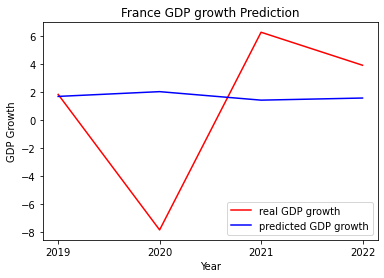

In [265]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [278]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(x_test, predicted_growth))
print("Total model error is = ", rmse)

Total model error is =  5.6366843848164665


In [277]:
prediction = x_test.merge(pred, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

-2.5466578407045724


,Actual,Prediction,Diff
Year,,,
2019,1.842972,1.700022,0.142949
2020,-7.855256,2.041199,-9.896455
2021,6.293000,1.432744,4.860256
2022,3.931000,1.584408,2.346592


#### France

In [275]:
min(data_train['France']), max(data_train['France'])

(-2.8733138284963076, 4.743142193564836)

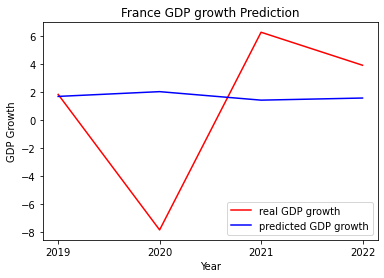

In [279]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [272]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(x_test, predicted_growth))
print("Total model error is = ", rmse)

Total model error is =  5.6366843848164665


In [273]:
prediction = x_test.merge(pred, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

,Actual,Prediction
Year,,
2019,1.842972,1.700022
2020,-7.855256,2.041199
2021,6.293000,1.432744
2022,3.931000,1.584408


#### Japan

In [384]:
# epochs 50
min(data_train['Japan']), max(data_train['Japan'])

(-5.693236358822659, 6.7850201094699685)

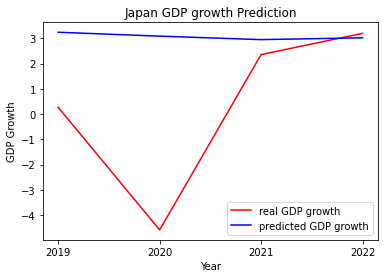

In [385]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [386]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(x_test, predicted_growth))
print("Total model error is = ", rmse)

Total model error is =  4.12639295254092


In [388]:
prediction = x_test.merge(pred, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

-11.0635553697839


,Actual,Prediction,Diff
Year,,,
2019,0.270305,3.242998,-2.972693
2020,-4.585508,3.088446,-7.673954
2021,2.358000,2.950569,-0.592569
2022,3.199000,3.023339,0.175661


#### United Kingdom

In [499]:
# epochs 50
min(data_train['United Kingdom']), max(data_train['United Kingdom'])

(-4.24735626579708, 5.732413721900926)

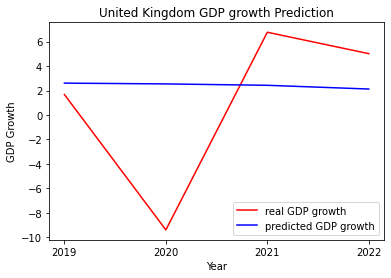

In [500]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [501]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(x_test, predicted_growth))
print("Total model error is = ", rmse)

Total model error is =  6.5286602270149166


In [502]:
prediction = x_test.merge(pred, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

-5.637456502787511


,Actual,Prediction,Diff
Year,,,
2019,1.671944,2.603534,-0.931590
2020,-9.396160,2.539075,-11.935235
2021,6.763000,2.425806,4.337194
2022,5.013000,2.120826,2.892174


#### United States

In [592]:
# epochs 40
min(data_train['United States']), max(data_train['United States'])

(-2.5367570671420197, 7.236633157781867)

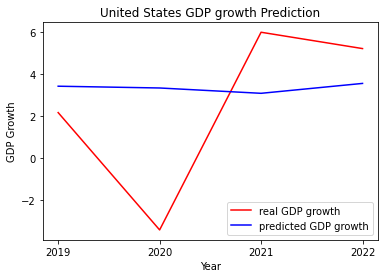

In [593]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [594]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(x_test, predicted_growth))
print("Total model error is = ", rmse)

Total model error is =  3.808722497332091


In [595]:
prediction = x_test.merge(pred, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

-3.435026351941736


,Actual,Prediction,Diff
Year,,,
2019,2.161177,3.412643,-1.251467
2020,-3.404592,3.328587,-6.733178
2021,5.973000,3.076060,2.896940
2022,5.198000,3.545321,1.652679


#### Canada

In [708]:
# epochs 40
min(data_train['Canada']), max(data_train['Canada'])

(-3.187, 5.908)

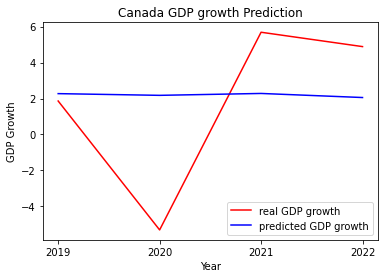

In [709]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [710]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(x_test, predicted_growth))
print("Total model error is = ", rmse)

Total model error is =  4.355820543771886


In [711]:
prediction = x_test.merge(pred, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

-1.6594066619873047


,Actual,Prediction,Diff
Year,,,
2019,1.861,2.271560,-0.410560
2020,-5.313,2.176268,-7.489268
2021,5.688,2.281805,3.406195
2022,4.889,2.054775,2.834225


# ***LSTM***

### **Data Prep**

#### India

In [29]:
country = 'India'

In [30]:
x_train = np.array(data_train[['India']])
x_test = data_test[['India']]

In [31]:
x_train

array([[6.73582153],
       [6.00620362],
       [3.47573324],
       [7.2888929 ],
       [3.82073786],
       [5.25429922],
       [4.77656417],
       [3.96535563],
       [9.62778292],
       [5.94734333],
       [5.53345456],
       [1.05683143],
       [5.48239602],
       [4.75077622],
       [6.65892407],
       [7.57449184],
       [7.54952225],
       [4.04982085],
       [6.18441582],
       [8.84575556],
       [3.84099116],
       [4.82396626],
       [3.80397532],
       [7.86038148],
       [7.92293661],
       [7.92343062],
       [8.06073257],
       [7.66081507],
       [3.08669806],
       [7.86188883],
       [8.4975847 ],
       [5.241315  ],
       [5.45638875],
       [6.3861064 ],
       [7.41022761],
       [7.99625379],
       [8.2563055 ],
       [6.79538342],
       [6.53298901]])

In [32]:
x_test

,India
0,4.041554
1,-7.251755
2,9.497000
3,8.523000


#### France

In [52]:
country = 'France'

In [53]:
x_train = np.array(data_train[['France']])
x_test = data_test[['France']]

In [54]:
x_train

array([[ 1.57874526],
       [ 1.06901984],
       [ 2.50539662],
       [ 1.24086486],
       [ 1.5137216 ],
       [ 1.62278137],
       [ 2.33727635],
       [ 2.56190033],
       [ 4.74314219],
       [ 4.34386106],
       [ 2.92393508],
       [ 1.04817585],
       [ 1.59934268],
       [-0.62866635],
       [ 2.35834218],
       [ 2.10669525],
       [ 1.41299367],
       [ 2.33629653],
       [ 3.58865943],
       [ 3.4213738 ],
       [ 3.92366923],
       [ 1.98372142],
       [ 1.13553148],
       [ 0.82316076],
       [ 2.82975293],
       [ 1.66321998],
       [ 2.4493236 ],
       [ 2.42473624],
       [ 0.25494596],
       [-2.87331383],
       [ 1.94943762],
       [ 2.19270063],
       [ 0.31313475],
       [ 0.57632667],
       [ 0.95618305],
       [ 1.11291234],
       [ 1.0954644 ],
       [ 2.29141999],
       [ 1.86506607]])

In [55]:
x_test

,France
0,1.842972
1,-7.855256
2,6.293000
3,3.931000


#### Japan

In [81]:
country = 'Japan'

In [82]:
x_train = np.array(data_train[['Japan']])
x_test = data_test[['Japan']]

In [83]:
x_train

array([[ 2.81759121],
       [ 4.20933647],
       [ 3.31245674],
       [ 3.52304499],
       [ 4.50199482],
       [ 5.23338095],
       [ 3.32652562],
       [ 4.73066586],
       [ 6.78502011],
       [ 4.85803769],
       [ 4.89271307],
       [ 3.41749676],
       [ 0.84806958],
       [-0.51791985],
       [ 0.99306636],
       [ 2.63099962],
       [ 3.13387099],
       [ 0.98122873],
       [-1.27033049],
       [-0.33392996],
       [ 2.76464755],
       [ 0.38610343],
       [ 0.0419625 ],
       [ 1.5351255 ],
       [ 2.18611569],
       [ 1.80390087],
       [ 1.37235013],
       [ 1.48396941],
       [-1.224289  ],
       [-5.69323636],
       [ 4.09791792],
       [ 0.02380952],
       [ 1.374751  ],
       [ 2.00510018],
       [ 0.29620551],
       [ 1.5606267 ],
       [ 0.75382675],
       [ 1.67533175],
       [ 0.55885128]])

In [84]:
x_test

,Japan
0,0.270305
1,-4.585508
2,2.358000
3,3.199000


#### United Kingdom

In [108]:
country = 'United Kingdom'

In [109]:
x_train = np.array(data_train[['United Kingdom']])
x_test = data_test[['United Kingdom']]

In [110]:
x_train

array([[-2.03136779],
       [-0.78774382],
       [ 1.99489131],
       [ 4.22185628],
       [ 2.26910518],
       [ 4.147415  ],
       [ 3.15034054],
       [ 5.39273831],
       [ 5.73241372],
       [ 2.57760269],
       [ 0.73375552],
       [-1.10312166],
       [ 0.40108208],
       [ 2.48983099],
       [ 3.84600917],
       [ 2.53167001],
       [ 2.4285429 ],
       [ 4.90902574],
       [ 3.15397338],
       [ 2.99011144],
       [ 3.67236911],
       [ 2.07265628],
       [ 2.12322277],
       [ 3.02988993],
       [ 2.35562976],
       [ 2.59328001],
       [ 2.58410468],
       [ 2.26948687],
       [-0.23963808],
       [-4.24735627],
       [ 2.1314382 ],
       [ 1.45756339],
       [ 1.46988752],
       [ 1.89001834],
       [ 2.99116481],
       [ 2.62259668],
       [ 2.26346354],
       [ 2.13445309],
       [ 1.6509255 ]])

In [111]:
x_test

,United Kingdom
0,1.671944
1,-9.396160
2,6.763000
3,5.013000


#### United States	

In [136]:
country = 'United States'

In [137]:
x_train = np.array(data_train[['United States']])
x_test = data_test[['United States']]

In [138]:
x_train

array([[-0.25674968],
       [ 2.5377193 ],
       [-1.80288741],
       [ 4.58391336],
       [ 7.23663316],
       [ 4.16965621],
       [ 3.46264598],
       [ 3.45925198],
       [ 4.17706128],
       [ 3.67264816],
       [ 1.88596496],
       [-0.10826479],
       [ 3.52244052],
       [ 2.75178104],
       [ 4.02879326],
       [ 2.68421727],
       [ 3.7725655 ],
       [ 4.38177517],
       [ 4.48140756],
       [ 4.75323598],
       [ 4.12748402],
       [ 0.99834079],
       [ 1.74169525],
       [ 2.86121077],
       [ 3.79889112],
       [ 3.5132138 ],
       [ 2.85497229],
       [ 1.87617145],
       [-0.1365798 ],
       [-2.53675707],
       [ 2.56376656],
       [ 1.5508355 ],
       [ 2.24954585],
       [ 1.84208107],
       [ 2.52597345],
       [ 3.07551465],
       [ 1.71142677],
       [ 2.3326794 ],
       [ 2.99646435]])

In [139]:
x_test

,United States
0,2.161177
1,-3.404592
2,5.973000
3,5.198000


#### Canada

In [164]:
country = 'Canada'

In [165]:
x_train = np.array(data_train[['Canada']])
x_test = data_test[['Canada']]

In [166]:
x_train

array([[ 2.163],
       [ 3.503],
       [-3.187],
       [ 2.601],
       [ 5.908],
       [ 4.737],
       [ 2.145],
       [ 4.073],
       [ 4.41 ],
       [ 2.317],
       [ 0.165],
       [-2.086],
       [ 0.9  ],
       [ 2.661],
       [ 4.494],
       [ 2.694],
       [ 1.619],
       [ 4.28 ],
       [ 3.896],
       [ 5.163],
       [ 5.178],
       [ 1.79 ],
       [ 3.018],
       [ 1.802],
       [ 3.087],
       [ 3.204],
       [ 2.634],
       [ 2.072],
       [ 1.004],
       [-2.926],
       [ 3.09 ],
       [ 3.146],
       [ 1.761],
       [ 2.329],
       [ 2.87 ],
       [ 0.659],
       [ 1.001],
       [ 3.04 ],
       [ 2.43 ]])

In [167]:
x_test

,Canada
0,1.861
1,-5.313
2,5.688
3,4.889


### **Initialising the rolling window for training**

In [168]:
# Feature Scaling using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(x_train)
training_set_scaled

array([[0.58823529],
       [0.73556899],
       [0.        ],
       [0.63639362],
       [1.        ],
       [0.87124794],
       [0.58625618],
       [0.79824079],
       [0.83529412],
       [0.60516767],
       [0.36855415],
       [0.12105553],
       [0.44936778],
       [0.64299065],
       [0.84452996],
       [0.64661902],
       [0.52842221],
       [0.82100055],
       [0.77877955],
       [0.91808686],
       [0.91973612],
       [0.54722375],
       [0.68224299],
       [0.54854316],
       [0.68982958],
       [0.70269379],
       [0.64002199],
       [0.5782298 ],
       [0.46080264],
       [0.02869709],
       [0.69015943],
       [0.69631666],
       [0.54403518],
       [0.60648708],
       [0.66597031],
       [0.42286971],
       [0.46047279],
       [0.6846619 ],
       [0.61759208]])

In [169]:
window_size = 8

In [170]:
#creating a data structure with 60 points as inputs and point as output in a rolling fashion
X_train = []
Y_train = []
for i in range (window_size,x_train.shape[0]):
  #0 says the first element --removing the brackets-- 0th column
  X_train.append(training_set_scaled[i-window_size:i,0])
  Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train) , np.array(Y_train)
X_train

array([[0.58823529, 0.73556899, 0.        , 0.63639362, 1.        ,
        0.87124794, 0.58625618, 0.79824079],
       [0.73556899, 0.        , 0.63639362, 1.        , 0.87124794,
        0.58625618, 0.79824079, 0.83529412],
       [0.        , 0.63639362, 1.        , 0.87124794, 0.58625618,
        0.79824079, 0.83529412, 0.60516767],
       [0.63639362, 1.        , 0.87124794, 0.58625618, 0.79824079,
        0.83529412, 0.60516767, 0.36855415],
       [1.        , 0.87124794, 0.58625618, 0.79824079, 0.83529412,
        0.60516767, 0.36855415, 0.12105553],
       [0.87124794, 0.58625618, 0.79824079, 0.83529412, 0.60516767,
        0.36855415, 0.12105553, 0.44936778],
       [0.58625618, 0.79824079, 0.83529412, 0.60516767, 0.36855415,
        0.12105553, 0.44936778, 0.64299065],
       [0.79824079, 0.83529412, 0.60516767, 0.36855415, 0.12105553,
        0.44936778, 0.64299065, 0.84452996],
       [0.83529412, 0.60516767, 0.36855415, 0.12105553, 0.44936778,
        0.64299065, 0.844529

In [171]:
#reshape (not used iloc so we need to reshape)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.58823529],
        [0.73556899],
        [0.        ],
        [0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079]],

       [[0.73556899],
        [0.        ],
        [0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412]],

       [[0.        ],
        [0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767]],

       [[0.63639362],
        [1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767],
        [0.36855415]],

       [[1.        ],
        [0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767],
        [0.36855415],
        [0.12105553]],

       [[0.87124794],
        [0.58625618],
        [0.79824079],
        [0.83529412],
        [0.60516767],


In [172]:
X_train.shape
#putting just one value to the model that is why we reshaped the data, as 1198(rows), 60(cols), 1 (only one value)

(31, 8, 1)

### **Model Building- LSTM**

In [213]:
#importing relevant packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN

In [214]:
#initialise RNN
regressor = Sequential()

In [215]:
#add dense when you add output layer
#add first lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [216]:
#adding second LSTM layer
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [217]:
#adding the third layer
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [218]:
#adding fourth LSTM layer
#last layer would not have return sequence of errors
regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0.2))

In [219]:
#adding fifth LSTM layer
#adding second LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [220]:
#output dense layer
regressor.add(Dense(units = 1))

### **Model Training**

In [221]:
#compiling rnn
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

In [222]:
regressor.fit(X_train,Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1/1 [==============================] - 12s 12s/step - loss: 0.4066
Epoch 2/20
1/1 [==============================] - 0s 35ms/step - loss: 0.3849
Epoch 3/20
1/1 [==============================] - 0s 39ms/step - loss: 0.3644
Epoch 4/20
1/1 [==============================] - 0s 41ms/step - loss: 0.3409
Epoch 5/20
1/1 [==============================] - 0s 33ms/step - loss: 0.3152
Epoch 6/20
1/1 [==============================] - 0s 39ms/step - loss: 0.2796
Epoch 7/20
1/1 [==============================] - 0s 31ms/step - loss: 0.2505
Epoch 8/20
1/1 [==============================] - 0s 35ms/step - loss: 0.2130
Epoch 9/20
1/1 [==============================] - 0s 35ms/step - loss: 0.1680
Epoch 10/20
1/1 [==============================] - 0s 35ms/step - loss: 0.1297
Epoch 11/20
1/1 [==============================] - 0s 37ms/step - loss: 0.0881
Epoch 12/20
1/1 [==============================] - 0s 35ms/step - loss: 0.0574
Epoch 13/20
1/1 [==============================] - 0s 35ms/st

In [ ]:
# 18 epoch 0.0536
# 20 epoch 0.0447
# 25 epoch 0.0493

###  **Prediction**

In [223]:
#get the predicted for the etst data that is 2017 jan
dataset_total = pd.concat((data_train[country], data_test[country]),axis = 0)
inputs = dataset_total[len(dataset_total)- len(data_test)-window_size:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
upper_limit = window_size + x_test.shape[0]
for i in range(window_size,upper_limit):
  X_test.append(inputs[i-window_size:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_growth_lstm = regressor.predict(X_test)
predicted_growth_lstm = sc.inverse_transform(predicted_growth_lstm)

In [224]:
yr = ['2019','2020','2021','2022']
x_test['Year'] = yr
x_test.set_index('Year',inplace = True)
x_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Canada
Year,
2019,1.861
2020,-5.313
2021,5.688
2022,4.889


In [225]:
pred_lstm = pd.DataFrame(predicted_growth_lstm)
pred_lstm['Year'] = yr
pred_lstm.set_index('Year',inplace = True)
pred_lstm

,0
Year,
2019,1.754893
2020,1.680224
2021,1.689866
2022,1.650441


#### India

In [43]:
# epochs 20
regressor.save('/content/drive/MyDrive/Research_2022/India_lstm.h5')

In [47]:
min(data_train['India']),max(data_train['India'])

(1.0568314329430848, 9.627782919848187)

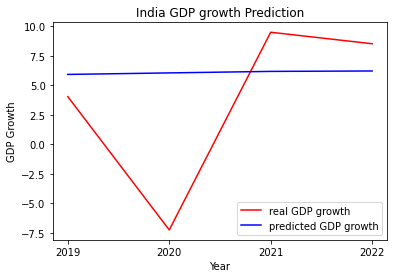

In [49]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred_lstm ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [50]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(x_test, predicted_growth_lstm))
print("Total model error is = ", rmse)

Total model error is =  7.015101533400134


In [51]:
prediction = x_test.merge(pred_lstm, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

-9.559137133952259


,Actual,Prediction,Diff
Year,,,
2019,4.041554,5.922827,-1.881273
2020,-7.251755,6.051466,-13.303221
2021,9.497000,6.179647,3.317353
2022,8.523000,6.214996,2.308004


#### France

In [74]:
# epochs 20
regressor.save('/content/drive/MyDrive/Research_2022/France_lstm.h5')

In [75]:
min(data_train['France']), max(data_train['France'])

(-2.8733138284963076, 4.743142193564836)

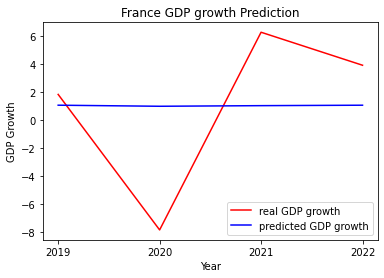

In [77]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred_lstm ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [79]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm = math.sqrt(mean_squared_error(x_test, predicted_growth_lstm))
print("Total model error is = ", rmse_lstm)

Total model error is =  5.355127651944337


In [80]:
prediction = x_test.merge(pred_lstm, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

0.03590502312217936


,Actual,Prediction,Diff
Year,,,
2019,1.842972,1.071183,0.771788
2020,-7.855256,0.995017,-8.850273
2021,6.293000,1.038949,5.254051
2022,3.931000,1.070662,2.860338


#### Japan

In [107]:
# epochs 20
regressor.save('/content/drive/MyDrive/Research_2022/Japan_lstm.h5')

In [103]:
# epochs 20
min(data_train['Japan']), max(data_train['Japan'])

(-5.693236358822659, 6.7850201094699685)

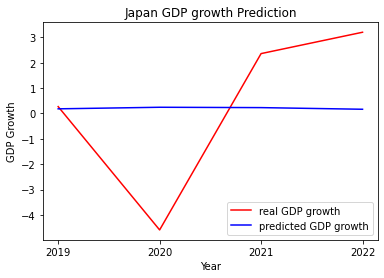

In [104]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred_lstm ,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [105]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm = math.sqrt(mean_squared_error(x_test, predicted_growth_lstm))
print("Total model error is = ", rmse_lstm)

Total model error is =  3.04393587217709


In [106]:
prediction = x_test.merge(pred_lstm, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

0.41711000103805196


,Actual,Prediction,Diff
Year,,,
2019,0.270305,0.182846,0.087459
2020,-4.585508,0.244797,-4.830306
2021,2.358000,0.230848,2.127152
2022,3.199000,0.166195,3.032805


#### United Kingdom

In [130]:
# epochs 20
regressor.save('/content/drive/MyDrive/Research_2022/uk_lstm.h5')

In [131]:
# epochs 20
min(data_train['United Kingdom']), max(data_train['United Kingdom'])

(-4.24735626579708, 5.732413721900926)

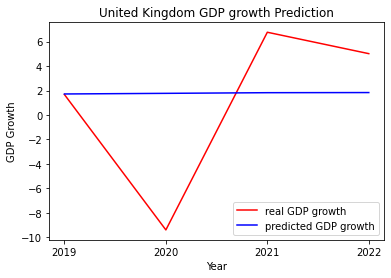

In [132]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred_lstm,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [133]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm = math.sqrt(mean_squared_error(x_test, predicted_growth_lstm))
print("Total model error is = ", rmse_lstm)

Total model error is =  6.308136778017845


In [135]:
prediction = x_test.merge(pred_lstm, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

-3.08701797949497


,Actual,Prediction,Diff
Year,,,
2019,1.671944,1.716827,-0.044882
2020,-9.396160,1.767879,-11.164039
2021,6.763000,1.821733,4.941267
2022,5.013000,1.832363,3.180637


#### United States

In [158]:
# epochs 20
regressor.save('/content/drive/MyDrive/Research_2022/us_lstm.h5')

In [160]:
# epochs 20
min(data_train['United States']), max(data_train['United States'])

(-2.5367570671420197, 7.236633157781867)

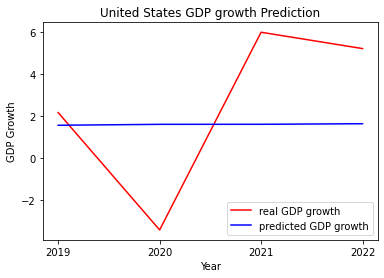

In [161]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred_lstm,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [162]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm = math.sqrt(mean_squared_error(x_test, predicted_growth_lstm))
print("Total model error is = ", rmse_lstm)

Total model error is =  3.7824380543353726


In [163]:
prediction = x_test.merge(pred_lstm, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

3.524220521913855


,Actual,Prediction,Diff
Year,,,
2019,2.161177,1.560204,0.600972
2020,-3.404592,1.604078,-5.008669
2021,5.973000,1.605943,4.367057
2022,5.198000,1.633140,3.564860


#### Canada

In [226]:
# epochs 20
regressor.save('/content/drive/MyDrive/Research_2022/cad_lstm.h5')

In [227]:
# epochs 40
min(data_train['Canada']), max(data_train['Canada'])

(-3.187, 5.908)

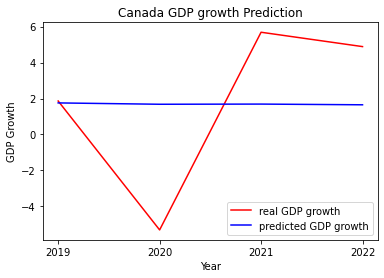

In [228]:
#visualize the predictions and see where our model stands and how far off we are
plt.plot(x_test,color = 'red', label = 'real GDP growth')
plt.plot(pred_lstm,color = 'blue', label = 'predicted GDP growth')
plt.title("{} GDP growth Prediction".format(country))
plt.xlabel("Year")
plt.ylabel('GDP Growth')
plt.legend(loc = 'lower right')
plt.show()

In [229]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm = math.sqrt(mean_squared_error(x_test, predicted_growth_lstm))
print("Total model error is = ", rmse_lstm)

Total model error is =  4.341364586382413


In [230]:
prediction = x_test.merge(pred_lstm, on = 'Year')
prediction.columns = ['Actual','Prediction']
prediction['Diff'] = prediction['Actual']-prediction['Prediction']
total_loss = np.sum(prediction['Diff'])
print(total_loss)
prediction

0.34957563877105713


,Actual,Prediction,Diff
Year,,,
2019,1.861,1.754893,0.106107
2020,-5.313,1.680224,-6.993224
2021,5.688,1.689866,3.998134
2022,4.889,1.650441,3.238559


# ***ARIMA model***

In [323]:
arima_data = data.set_index('Year')
arima_data

,France,India,Japan,United Kingdom,United States,Canada
Year,,,,,,
1980-01-01,1.578745,6.735822,2.817591,-2.031368,-0.256750,2.163
1981-01-01,1.069020,6.006204,4.209336,-0.787744,2.537719,3.503
1982-01-01,2.505397,3.475733,3.312457,1.994891,-1.802887,-3.187
1983-01-01,1.240865,7.288893,3.523045,4.221856,4.583913,2.601
1984-01-01,1.513722,3.820738,4.501995,2.269105,7.236633,5.908
1985-01-01,1.622781,5.254299,5.233381,4.147415,4.169656,4.737
1986-01-01,2.337276,4.776564,3.326526,3.150341,3.462646,2.145
1987-01-01,2.561900,3.965356,4.730666,5.392738,3.459252,4.073
1988-01-01,4.743142,9.627783,6.785020,5.732414,4.177061,4.410


In [324]:
arima_test = data_test.set_index('Year')
arima_test

,France,India,Japan,United Kingdom,United States,Canada
Year,,,,,,
2019-01-01,1.842972,4.041554,0.270305,1.671944,2.161177,1.861
2020-01-01,-7.855256,-7.251755,-4.585508,-9.396160,-3.404592,-5.313
2021-01-01,6.293000,9.497000,2.358000,6.763000,5.973000,5.688
2022-01-01,3.931000,8.523000,3.199000,5.013000,5.198000,4.889


In [325]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [326]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [327]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#### France

In [328]:
france_ar_train = arima_data[['France']]

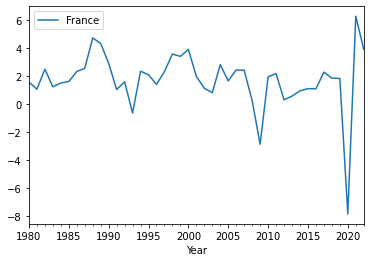

In [329]:
france_ar_train.plot()

In [330]:
test_result=adfuller_test(france_ar_train['France'])

ADF Test Statistic : -6.51413786903885
p-value : 1.0818887533507414e-08
#Lags Used : 0
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


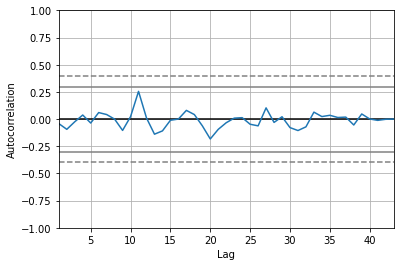

In [331]:
autocorrelation_plot(france_ar_train['France'])
plt.show()

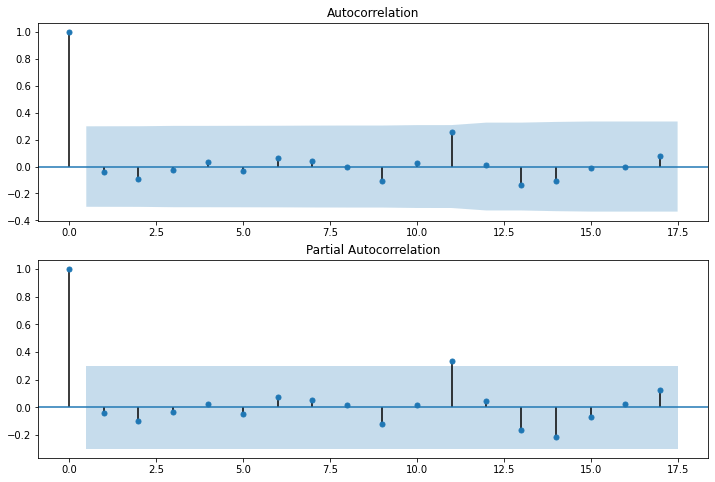

In [332]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(france_ar_train['France'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(france_ar_train['France'],ax=ax2)

In [333]:
model=ARIMA(france_ar_train['France'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [334]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.France   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -92.117
Method:                       css-mle   S.D. of innovations              2.071
Date:                Wed, 15 Jun 2022   AIC                            192.234
Time:                        18:12:23   BIC                            199.185
Sample:                    01-01-1981   HQIC                           194.782
                         - 01-01-2022                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0312      0.024     -1.301      0.201      -0.078       0.016
ar.L1.D.France    -0.0683      0.158     -0.433      0.668      -0.377       0.241
ma.L1.D.France    -0.9999      0.068    -14.720      0.000      -1.133      -0.867
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -14.6493           +0.0000j           14.6493            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


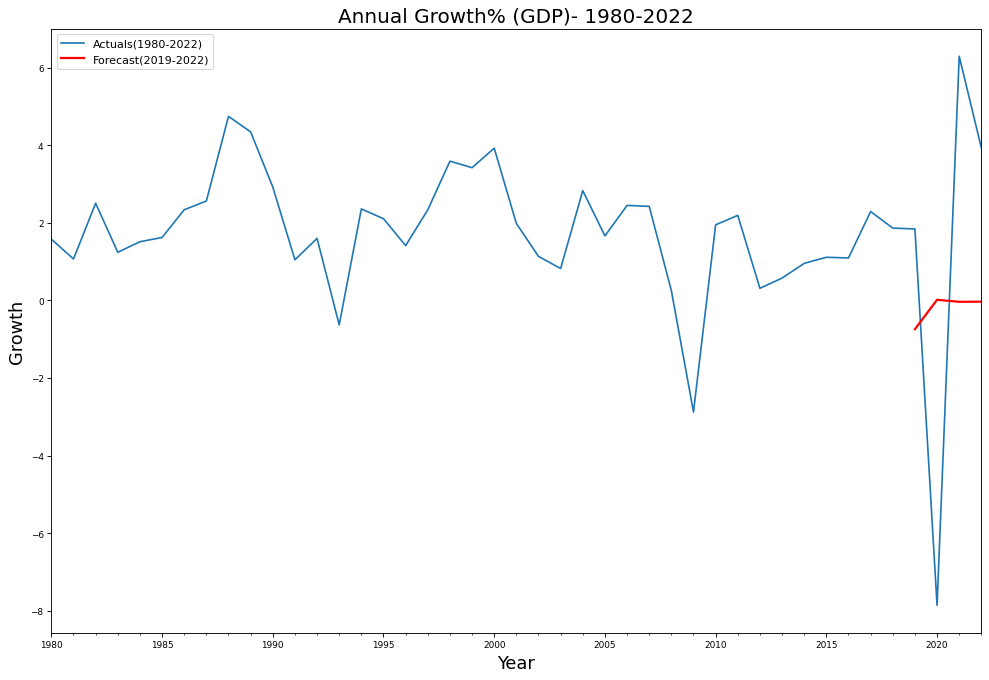

In [335]:
france_ar_train['forecast'] = 'NaN'
france_ar_train['forecast']=model_fit.predict(start=39,end=43,dynamic=True)

# Plot Data
fig = plt.figure(dpi=80, figsize=(15,10))
plt.title("Annual Growth% (GDP)- 1980-2022", fontsize=18)
france_ar_train['France'].plot( label="Actuals(1980-2022)")
france_ar_train['forecast'].plot(linewidth=2, c='red', label="Forecast(2019-2022)")
plt.xlabel('Year', fontsize=16)
plt.ylabel("Growth", fontsize=16)
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [336]:
france_ar_train

,France,forecast
Year,,
1980-01-01,1.578745,NaN
1981-01-01,1.069020,NaN
1982-01-01,2.505397,NaN
1983-01-01,1.240865,NaN
1984-01-01,1.513722,NaN
1985-01-01,1.622781,NaN
1986-01-01,2.337276,NaN
1987-01-01,2.561900,NaN
1988-01-01,4.743142,NaN


In [337]:
france_ar_train['forecast_full'] = 'NaN'
france_ar_train['forecast_full'] = model_fit.predict(start=2,end=43,dynamic=True)
france_ar_train['forecast_full']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Year
1980-01-01         NaN
1981-01-01         NaN
1982-01-01    0.001463
1983-01-01   -0.033432
1984-01-01   -0.031050
1985-01-01   -0.031213
1986-01-01   -0.031202
1987-01-01   -0.031202
1988-01-01   -0.031202
1989-01-01   -0.031202
1990-01-01   -0.031202
1991-01-01   -0.031202
1992-01-01   -0.031202
1993-01-01   -0.031202
1994-01-01   -0.031202
1995-01-01   -0.031202
1996-01-01   -0.031202
1997-01-01   -0.031202
1998-01-01   -0.031202
1999-01-01   -0.031202
2000-01-01   -0.031202
2001-01-01   -0.031202
2002-01-01   -0.031202
2003-01-01   -0.031202
2004-01-01   -0.031202
2005-01-01   -0.031202
2006-01-01   -0.031202
2007-01-01   -0.031202
2008-01-01   -0.031202
2009-01-01   -0.031202
2010-01-01   -0.031202
2011-01-01   -0.031202
2012-01-01   -0.031202
2013-01-01   -0.031202
2014-01-01   -0.031202
2015-01-01   -0.031202
2016-01-01   -0.031202
2017-01-01   -0.031202
2018-01-01   -0.031202
2019-01-01   -0.031202
2020-01-01   -0.031202
2021-01-01   -0.031202
2022-01-01   -0.031202
Name: 

In [338]:
france_ar_train

,France,forecast,forecast_full
Year,,,
1980-01-01,1.578745,NaN,NaN
1981-01-01,1.069020,NaN,NaN
1982-01-01,2.505397,NaN,0.001463
1983-01-01,1.240865,NaN,-0.033432
1984-01-01,1.513722,NaN,-0.031050
1985-01-01,1.622781,NaN,-0.031213
1986-01-01,2.337276,NaN,-0.031202
1987-01-01,2.561900,NaN,-0.031202
1988-01-01,4.743142,NaN,-0.031202


In [339]:
from pandas.tseries.offsets import DateOffset
future_dates=[france_ar_train.index[-1]+ DateOffset(months=x)for x in [12,24]]

In [340]:
future_dates

[Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')]

In [341]:
future_pred_df = pd.DataFrame(index=future_dates[:],columns=france_ar_train.columns)

In [342]:
future_pred_df

,France,forecast,forecast_full
2023-01-01,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN


In [343]:
future_df=pd.concat([france_ar_train,future_pred_df])

In [344]:
future_df['forecast']

1980-01-01         NaN
1981-01-01         NaN
1982-01-01         NaN
1983-01-01         NaN
1984-01-01         NaN
1985-01-01         NaN
1986-01-01         NaN
1987-01-01         NaN
1988-01-01         NaN
1989-01-01         NaN
1990-01-01         NaN
1991-01-01         NaN
1992-01-01         NaN
1993-01-01         NaN
1994-01-01         NaN
1995-01-01         NaN
1996-01-01         NaN
1997-01-01         NaN
1998-01-01         NaN
1999-01-01         NaN
2000-01-01         NaN
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2004-01-01         NaN
2005-01-01         NaN
2006-01-01         NaN
2007-01-01         NaN
2008-01-01         NaN
2009-01-01         NaN
2010-01-01         NaN
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01         NaN
2016-01-01         NaN
2017-01-01         NaN
2018-01-01         NaN
2019-01-01   -0.740244
2020-01-01    0.017199
2021-01-01   -0.034506
2022-01-01   -0.030977
2023-01-01 

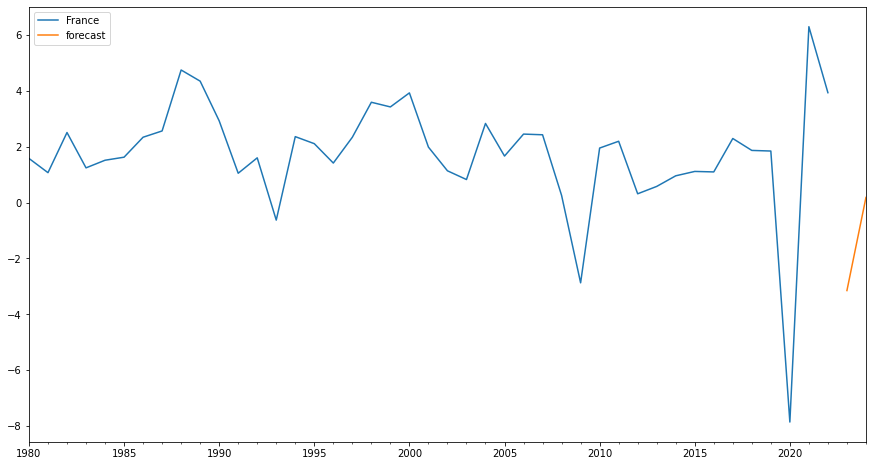

In [345]:
future_df['forecast'] = model_fit.predict(start = 43, end = 45, dynamic= True)  
future_df[['France', 'forecast']].plot(figsize=(15, 8)) 

#### India

In [346]:
india_ar_train = arima_data[['India']]
# india_ar_test = arima_test[['India']]
# india_ar_test

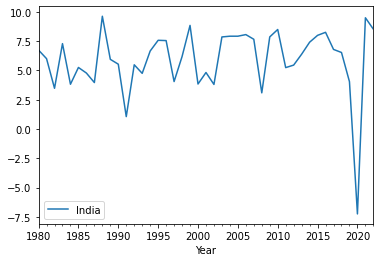

In [347]:
india_ar_train.plot()

In [348]:
test_result=adfuller_test(india_ar_train['India'])

ADF Test Statistic : -6.344077232437251
p-value : 2.7098714297145542e-08
#Lags Used : 0
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


differencing

In [349]:
india_ar_train['Growth First Difference'] = india_ar_train['India'] - india_ar_train['India'].shift(1)
india_ar_train['Growth First Difference']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Year
1980-01-01          NaN
1981-01-01    -0.729618
1982-01-01    -2.530470
1983-01-01     3.813160
1984-01-01    -3.468155
1985-01-01     1.433561
1986-01-01    -0.477735
1987-01-01    -0.811209
1988-01-01     5.662427
1989-01-01    -3.680440
1990-01-01    -0.413889
1991-01-01    -4.476623
1992-01-01     4.425565
1993-01-01    -0.731620
1994-01-01     1.908148
1995-01-01     0.915568
1996-01-01    -0.024970
1997-01-01    -3.499701
1998-01-01     2.134595
1999-01-01     2.661340
2000-01-01    -5.004764
2001-01-01     0.982975
2002-01-01    -1.019991
2003-01-01     4.056406
2004-01-01     0.062555
2005-01-01     0.000494
2006-01-01     0.137302
2007-01-01    -0.399918
2008-01-01    -4.574117
2009-01-01     4.775191
2010-01-01     0.635696
2011-01-01    -3.256270
2012-01-01     0.215074
2013-01-01     0.929718
2014-01-01     1.024121
2015-01-01     0.586026
2016-01-01     0.260052
2017-01-01    -1.460922
2018-01-01    -0.262394
2019-01-01    -2.491435
2020-01-01   -11.293309
2021-01-01 

In [350]:
adfuller_test(india_ar_train['Growth First Difference'].dropna())

ADF Test Statistic : -6.582316753457023
p-value : 7.460995136408163e-09
#Lags Used : 1
Number of Observations Used : 40
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


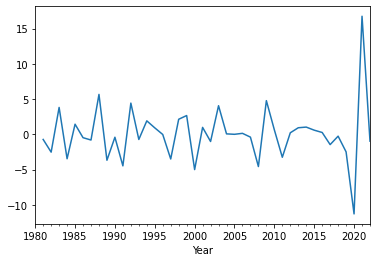

In [351]:
india_ar_train['Growth First Difference'].plot()

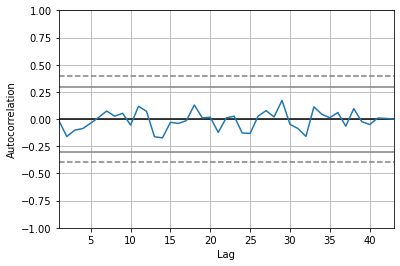

In [352]:
autocorrelation_plot(india_ar_train['India'])
plt.show()

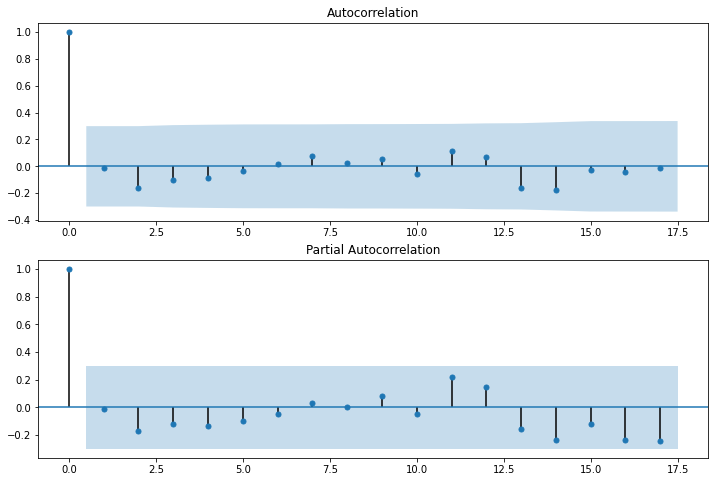

In [353]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(india_ar_train['India'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(india_ar_train['India'],ax=ax2)

In [354]:
model=ARIMA(india_ar_train['India'],order=(2,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [355]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.India   No. Observations:                   42
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -104.529
Method:                       css-mle   S.D. of innovations              2.777
Date:                Wed, 15 Jun 2022   AIC                            219.057
Time:                        18:14:45   BIC                            227.745
Sample:                    01-01-1981   HQIC                           222.242
                         - 01-01-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0119      0.030      0.391      0.698      -0.048       0.072
ar.L1.D.India    -0.0006      0.154     -0.004      0.997      -0.303       0.302
ar.L2.D.India    -0.1431      0.155     -0.925      0.361      -0.446       0.160
ma.L1.D.India    -0.9999      0.078    -12.783      0.000      -1.153      -0.847
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0019           -2.6431j            2.6431           -0.2501
AR.2           -0.0019           +2.6431j            2.6431            0.2501
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


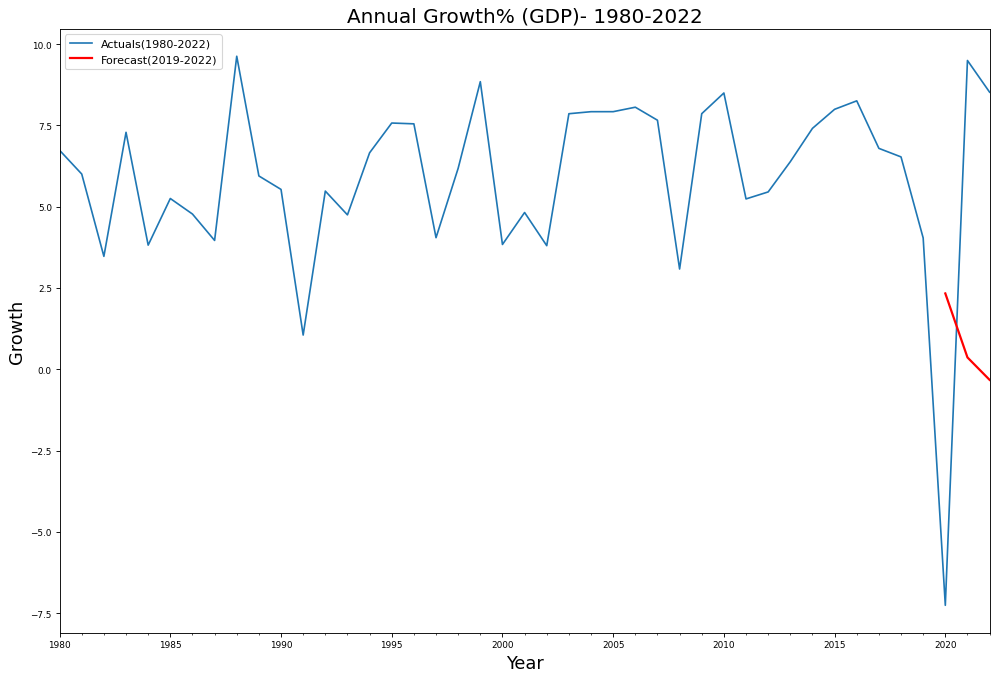

In [356]:
india_ar_train['forecast'] = 'NaN'
india_ar_train['forecast']=model_fit.predict(start=40,end=43,dynamic=True)

# Plot Data
fig = plt.figure(dpi=80, figsize=(15,10))
plt.title("Annual Growth% (GDP)- 1980-2022", fontsize=18)
india_ar_train['India'].plot( label="Actuals(1980-2022)")
india_ar_train['forecast'].plot(linewidth=2, c='red', label="Forecast(2019-2022)")
plt.xlabel('Year', fontsize=16)
plt.ylabel("Growth", fontsize=16)
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [357]:
from pandas.tseries.offsets import DateOffset
future_dates=[india_ar_train.index[-1]+ DateOffset(months=x)for x in [12,24]]

In [358]:
future_dates

[Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')]

In [359]:
future_pred_df = pd.DataFrame(index=future_dates[:],columns=india_ar_train.columns)

In [360]:
future_pred_df

,India,Growth First Difference,forecast
2023-01-01,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN


In [361]:
future_df=pd.concat([india_ar_train,future_pred_df])

In [362]:
future_df['forecast']

1980-01-01         NaN
1981-01-01         NaN
1982-01-01         NaN
1983-01-01         NaN
1984-01-01         NaN
1985-01-01         NaN
1986-01-01         NaN
1987-01-01         NaN
1988-01-01         NaN
1989-01-01         NaN
1990-01-01         NaN
1991-01-01         NaN
1992-01-01         NaN
1993-01-01         NaN
1994-01-01         NaN
1995-01-01         NaN
1996-01-01         NaN
1997-01-01         NaN
1998-01-01         NaN
1999-01-01         NaN
2000-01-01         NaN
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2004-01-01         NaN
2005-01-01         NaN
2006-01-01         NaN
2007-01-01         NaN
2008-01-01         NaN
2009-01-01         NaN
2010-01-01         NaN
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01         NaN
2016-01-01         NaN
2017-01-01         NaN
2018-01-01         NaN
2019-01-01         NaN
2020-01-01    2.336169
2021-01-01    0.368955
2022-01-01   -0.321014
2023-01-01 

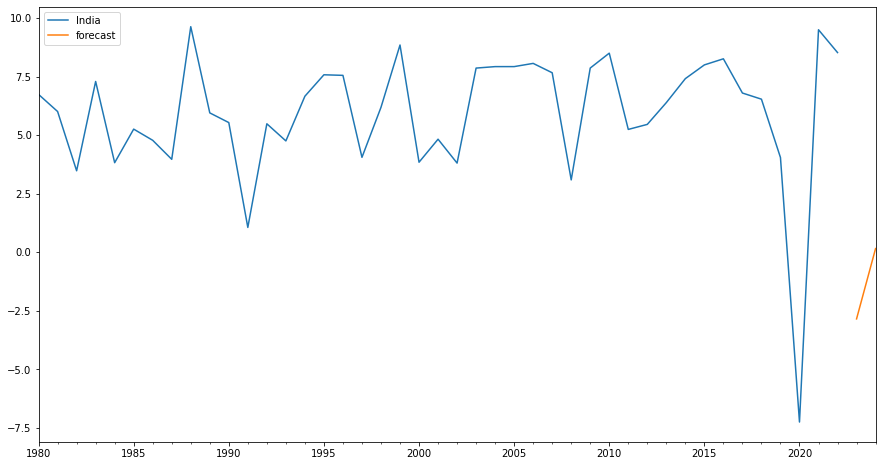

In [363]:
future_df['forecast'] = model_fit.predict(start = 43, end = 45, dynamic= True)  
future_df[['India', 'forecast']].plot(figsize=(15, 8)) 

#### Japan

In [364]:
japan_ar_train = arima_data[['Japan']]
#japan_ar_test = arima_test[['Japan']]

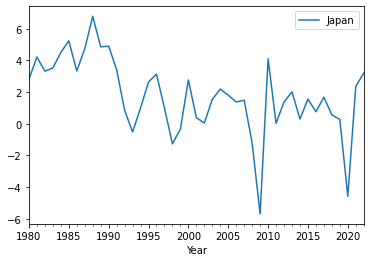

In [365]:
japan_ar_train.plot()

In [366]:
test_result=adfuller_test(japan_ar_train['Japan'])

ADF Test Statistic : -4.069399157619447
p-value : 0.0010876840120866652
#Lags Used : 0
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


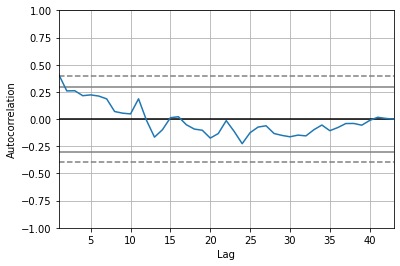

In [367]:
autocorrelation_plot(japan_ar_train['Japan'])
plt.show()

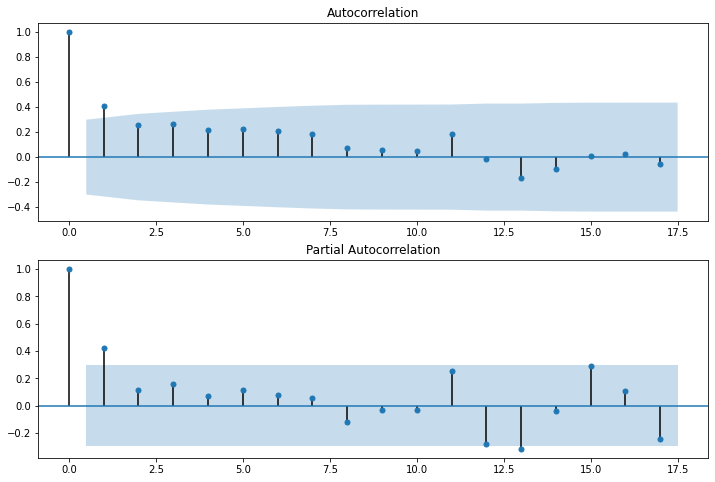

In [368]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(japan_ar_train['Japan'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(japan_ar_train['Japan'],ax=ax2)

In [369]:
model=ARIMA(japan_ar_train['Japan'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [370]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Japan   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -90.906
Method:                       css-mle   S.D. of innovations              2.024
Date:                Wed, 15 Jun 2022   AIC                            189.812
Time:                        18:16:19   BIC                            196.762
Sample:                    01-01-1981   HQIC                           192.359
                         - 01-01-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0967      0.031     -3.161      0.003      -0.157      -0.037
ar.L1.D.Japan     0.1951      0.160      1.218      0.230      -0.119       0.509
ma.L1.D.Japan    -1.0000      0.093    -10.771      0.000      -1.182      -0.818
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.1262           +0.0000j            5.1262            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


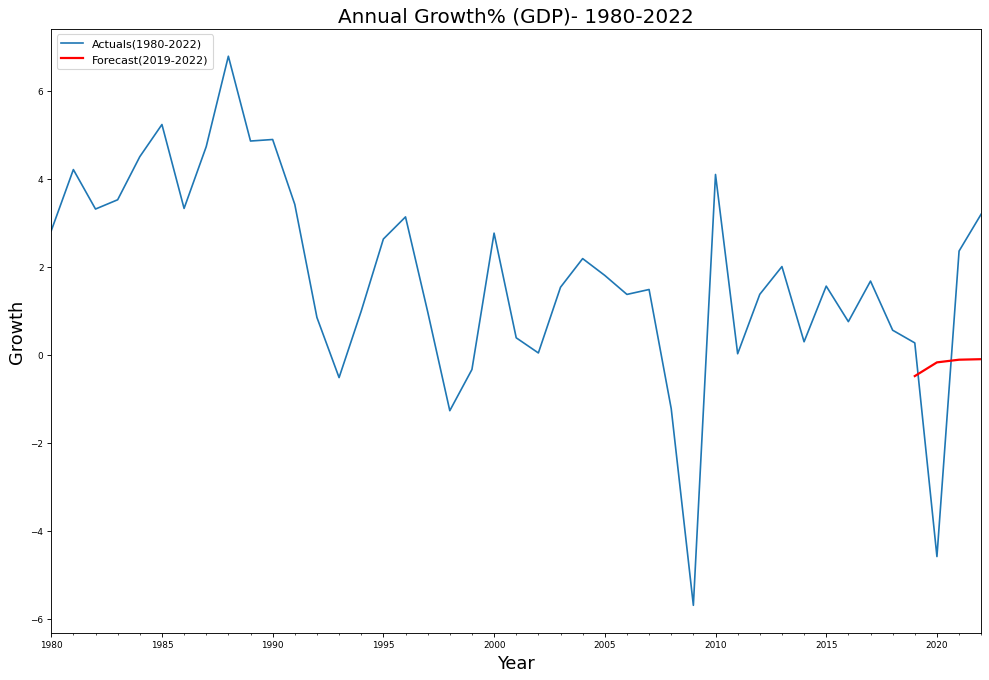

In [371]:
japan_ar_train['forecast'] = 'NaN'
japan_ar_train['forecast']=model_fit.predict(start=39,end=43,dynamic=True)

# Plot Data
fig = plt.figure(dpi=80, figsize=(15,10))
plt.title("Annual Growth% (GDP)- 1980-2022", fontsize=18)
japan_ar_train['Japan'].plot( label="Actuals(1980-2022)")
japan_ar_train['forecast'].plot(linewidth=2, c='red', label="Forecast(2019-2022)")
plt.xlabel('Year', fontsize=16)
plt.ylabel("Growth", fontsize=16)
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [372]:
from pandas.tseries.offsets import DateOffset
future_dates=[japan_ar_train.index[-1]+ DateOffset(months=x)for x in [12,24]]

In [ ]:
future_dates

[Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')]

In [ ]:
future_pred_df = pd.DataFrame(index=future_dates[:],columns=japan_ar_train.columns)

In [373]:
future_pred_df

,India,Growth First Difference,forecast
2023-01-01,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN


In [374]:
future_df=pd.concat([japan_ar_train,future_pred_df])

In [375]:
future_df['forecast']

1980-01-01         NaN
1981-01-01         NaN
1982-01-01         NaN
1983-01-01         NaN
1984-01-01         NaN
1985-01-01         NaN
1986-01-01         NaN
1987-01-01         NaN
1988-01-01         NaN
1989-01-01         NaN
1990-01-01         NaN
1991-01-01         NaN
1992-01-01         NaN
1993-01-01         NaN
1994-01-01         NaN
1995-01-01         NaN
1996-01-01         NaN
1997-01-01         NaN
1998-01-01         NaN
1999-01-01         NaN
2000-01-01         NaN
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2004-01-01         NaN
2005-01-01         NaN
2006-01-01         NaN
2007-01-01         NaN
2008-01-01         NaN
2009-01-01         NaN
2010-01-01         NaN
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01         NaN
2016-01-01         NaN
2017-01-01         NaN
2018-01-01         NaN
2019-01-01   -0.483433
2020-01-01   -0.172163
2021-01-01   -0.111442
2022-01-01   -0.099597
2023-01-01 

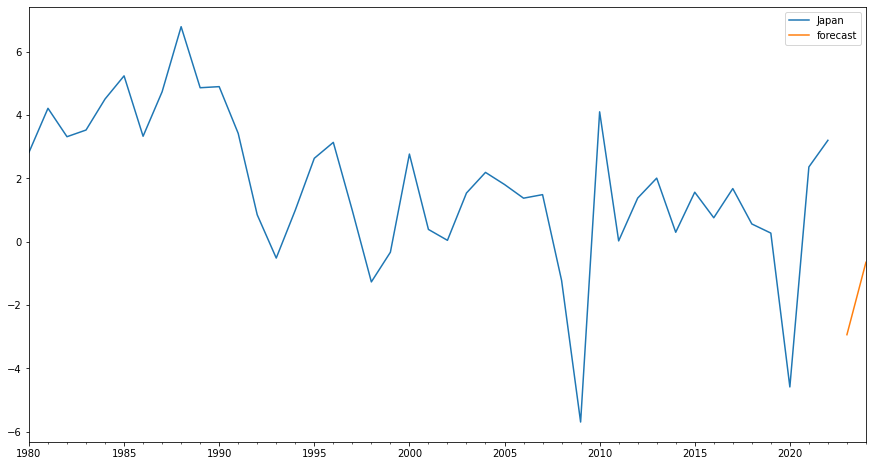

In [376]:
future_df['forecast'] = model_fit.predict(start = 43, end = 45, dynamic= True)  
future_df[['Japan', 'forecast']].plot(figsize=(15, 8)) 

#### United States

In [377]:
us_ar_train = arima_data[['United States']]
us_ar_test = arima_test[['United States']]

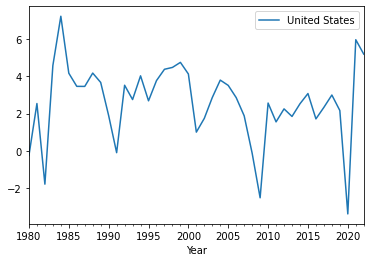

In [378]:
us_ar_train.plot()

In [382]:
test_result=adfuller_test(us_ar_train['United States'])

ADF Test Statistic : -5.259013058291551
p-value : 6.654089156327585e-06
#Lags Used : 0
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


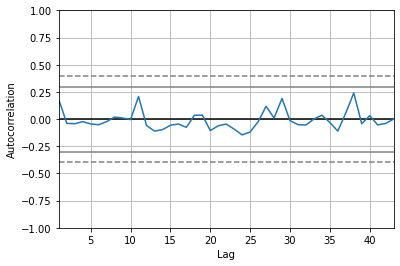

In [381]:
autocorrelation_plot(us_ar_train['United States'])
plt.show()

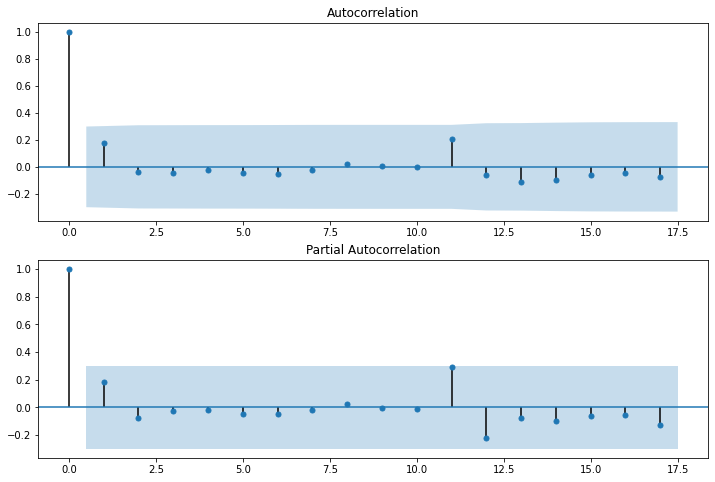

In [383]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(us_ar_train['United States'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(us_ar_train['United States'],ax=ax2)

In [384]:
model=ARIMA(us_ar_train['United States'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [385]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United States   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -91.382
Method:                       css-mle   S.D. of innovations              2.048
Date:                Wed, 15 Jun 2022   AIC                            190.764
Time:                        18:22:18   BIC                            197.714
Sample:                    01-01-1981   HQIC                           193.312
                         - 01-01-2022                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0172      0.031     -0.551      0.585      -0.078       0.044
ar.L1.D.United States     0.1976      0.164      1.204      0.236      -0.124       0.519
ma.L1.D.United States    -1.0000      0.072    -13.909      0.000      -1.141      -0.859
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.0603           +0.0000j            5.0603            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


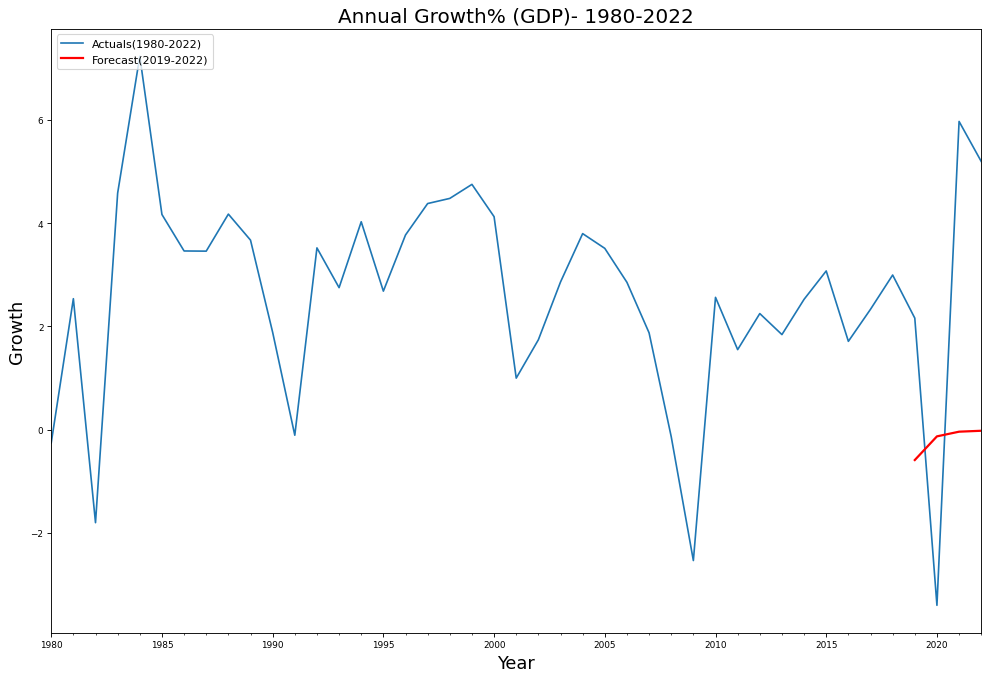

In [386]:
us_ar_train['forecast'] = 'NaN'
us_ar_train['forecast']=model_fit.predict(start=39,end=43,dynamic=True)

# Plot Data
fig = plt.figure(dpi=80, figsize=(15,10))
plt.title("Annual Growth% (GDP)- 1980-2022", fontsize=18)
us_ar_train['United States'].plot( label="Actuals(1980-2022)")
us_ar_train['forecast'].plot(linewidth=2, c='red', label="Forecast(2019-2022)")
plt.xlabel('Year', fontsize=16)
plt.ylabel("Growth", fontsize=16)
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [388]:
from pandas.tseries.offsets import DateOffset
future_dates=[us_ar_train.index[-1]+ DateOffset(months=x)for x in [12,24]]

In [389]:
future_dates

[Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')]

In [390]:
future_pred_df = pd.DataFrame(index=future_dates[:],columns=us_ar_train.columns)

In [391]:
future_pred_df

,United States,forecast
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN


In [392]:
future_df=pd.concat([us_ar_train,future_pred_df])

In [393]:
future_df['forecast']

1980-01-01         NaN
1981-01-01         NaN
1982-01-01         NaN
1983-01-01         NaN
1984-01-01         NaN
1985-01-01         NaN
1986-01-01         NaN
1987-01-01         NaN
1988-01-01         NaN
1989-01-01         NaN
1990-01-01         NaN
1991-01-01         NaN
1992-01-01         NaN
1993-01-01         NaN
1994-01-01         NaN
1995-01-01         NaN
1996-01-01         NaN
1997-01-01         NaN
1998-01-01         NaN
1999-01-01         NaN
2000-01-01         NaN
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2004-01-01         NaN
2005-01-01         NaN
2006-01-01         NaN
2007-01-01         NaN
2008-01-01         NaN
2009-01-01         NaN
2010-01-01         NaN
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01         NaN
2016-01-01         NaN
2017-01-01         NaN
2018-01-01         NaN
2019-01-01   -0.588821
2020-01-01   -0.130187
2021-01-01   -0.039554
2022-01-01   -0.021643
2023-01-01 

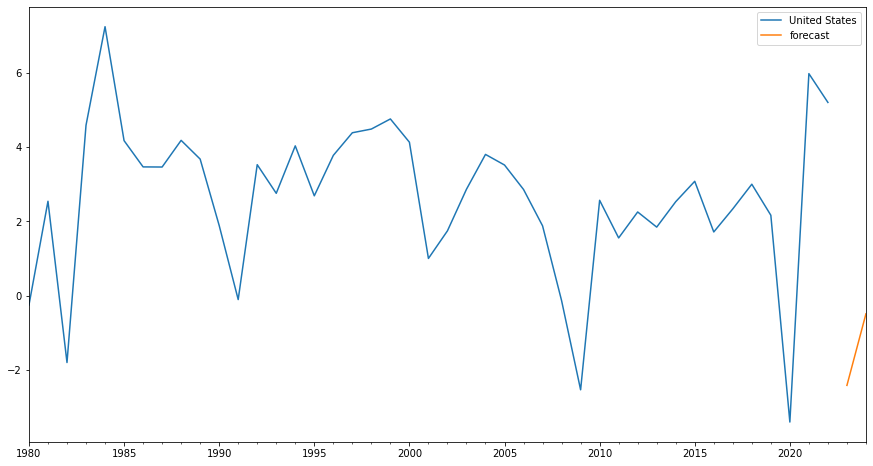

In [394]:
future_df['forecast'] = model_fit.predict(start = 43, end = 45, dynamic= True)  
future_df[['United States', 'forecast']].plot(figsize=(15, 8)) 

#### United Kingdom

In [395]:
uk_ar_train = arima_data[['United Kingdom']]
uk_ar_test = arima_test[['United Kingdom']]

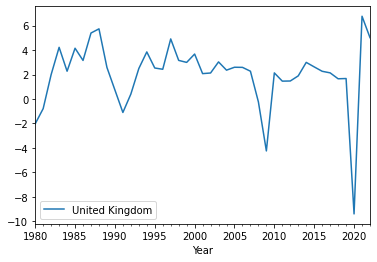

In [396]:
uk_ar_train.plot()

In [397]:
test_result=adfuller_test(uk_ar_train['United Kingdom'])

ADF Test Statistic : -5.798936364538414
p-value : 4.68017929423946e-07
#Lags Used : 0
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


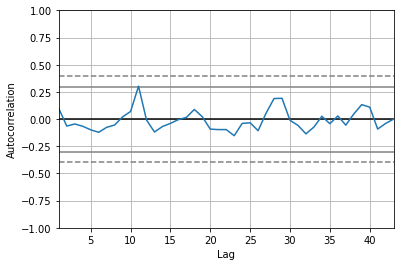

In [398]:
autocorrelation_plot(uk_ar_train['United Kingdom'])
plt.show()

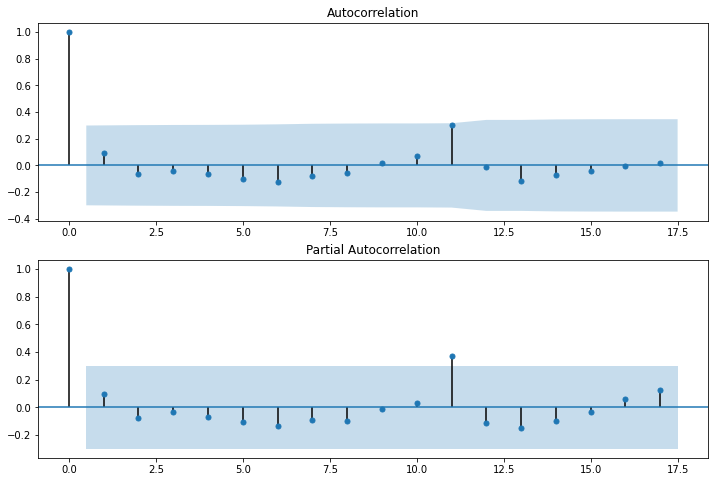

In [399]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(uk_ar_train['United Kingdom'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(uk_ar_train['United Kingdom'],ax=ax2)

In [400]:
model=ARIMA(uk_ar_train['United Kingdom'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [401]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.United Kingdom   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.448
Method:                       css-mle   S.D. of innovations              2.660
Date:                Wed, 15 Jun 2022   AIC                            212.896
Time:                        18:26:05   BIC                            219.846
Sample:                    01-01-1981   HQIC                           215.443
                         - 01-01-2022                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0193      0.037     -0.523      0.604      -0.091       0.053
ar.L1.D.United Kingdom     0.1109      0.165      0.672      0.505      -0.212       0.434
ma.L1.D.United Kingdom    -0.9999      0.069    -14.527      0.000      -1.135      -0.865
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.0190           +0.0000j            9.0190            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


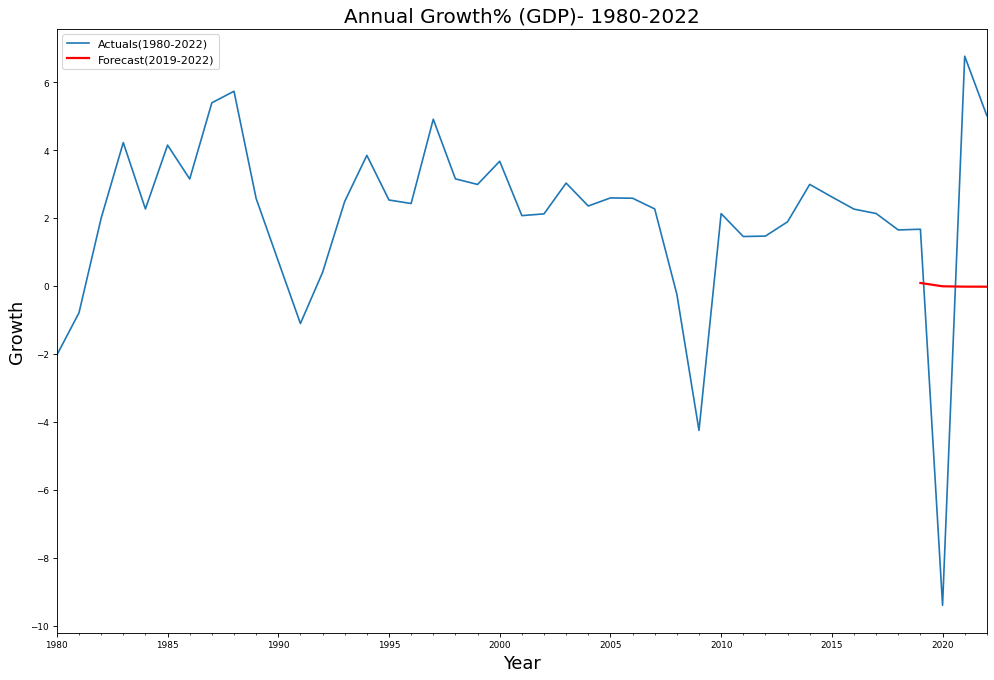

In [403]:
uk_ar_train['forecast'] = 'NaN'
uk_ar_train['forecast']=model_fit.predict(start=39,end=43,dynamic=True)

# Plot Data
fig = plt.figure(dpi=80, figsize=(15,10))
plt.title("Annual Growth% (GDP)- 1980-2022", fontsize=18)
uk_ar_train['United Kingdom'].plot( label="Actuals(1980-2022)")
uk_ar_train['forecast'].plot(linewidth=2, c='red', label="Forecast(2019-2022)")
plt.xlabel('Year', fontsize=16)
plt.ylabel("Growth", fontsize=16)
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [404]:
from pandas.tseries.offsets import DateOffset
future_dates=[uk_ar_train.index[-1]+ DateOffset(months=x)for x in [12,24]]

In [ ]:
future_dates

[Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')]

In [405]:
future_pred_df = pd.DataFrame(index=future_dates[:],columns=uk_ar_train.columns)

In [406]:
future_pred_df

,United Kingdom,forecast
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN


In [407]:
future_df=pd.concat([uk_ar_train,future_pred_df])

In [408]:
future_df['forecast']

1980-01-01         NaN
1981-01-01         NaN
1982-01-01         NaN
1983-01-01         NaN
1984-01-01         NaN
1985-01-01         NaN
1986-01-01         NaN
1987-01-01         NaN
1988-01-01         NaN
1989-01-01         NaN
1990-01-01         NaN
1991-01-01         NaN
1992-01-01         NaN
1993-01-01         NaN
1994-01-01         NaN
1995-01-01         NaN
1996-01-01         NaN
1997-01-01         NaN
1998-01-01         NaN
1999-01-01         NaN
2000-01-01         NaN
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2004-01-01         NaN
2005-01-01         NaN
2006-01-01         NaN
2007-01-01         NaN
2008-01-01         NaN
2009-01-01         NaN
2010-01-01         NaN
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01         NaN
2016-01-01         NaN
2017-01-01         NaN
2018-01-01         NaN
2019-01-01    0.090500
2020-01-01   -0.007091
2021-01-01   -0.017911
2022-01-01   -0.019111
2023-01-01 

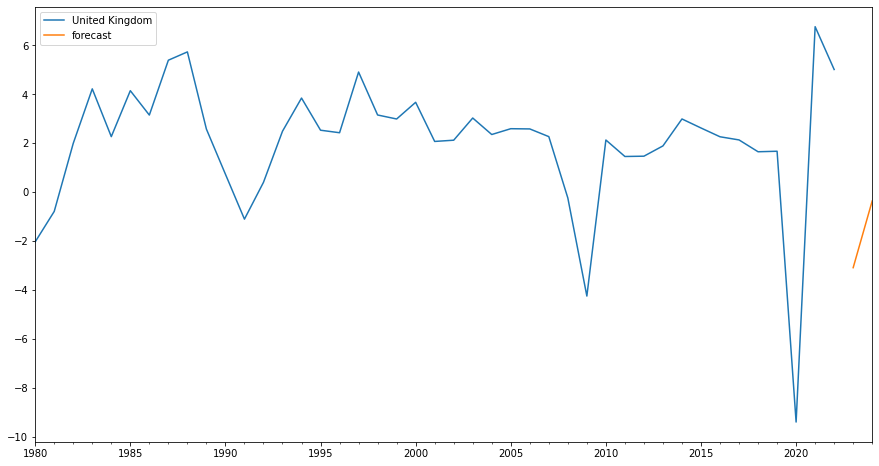

In [409]:
future_df['forecast'] = model_fit.predict(start = 43, end = 45, dynamic= True)  
future_df[['United Kingdom', 'forecast']].plot(figsize=(15, 8)) 

#### Canada 

In [410]:
canada_ar_train = arima_data[['Canada']]
canada_ar_test = arima_data[['Canada']]

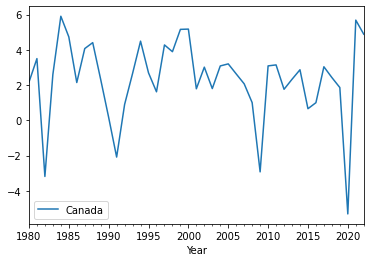

In [411]:
canada_ar_train.plot()

In [412]:
test_result=adfuller_test(canada_ar_train['Canada'])

ADF Test Statistic : -5.594191096549242
p-value : 1.3083392996584366e-06
#Lags Used : 0
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


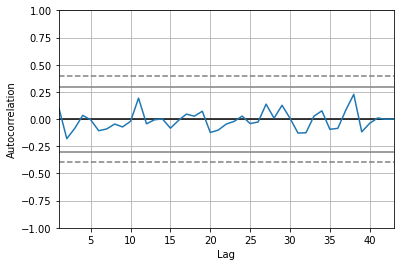

In [413]:
autocorrelation_plot(canada_ar_train['Canada'])
plt.show()

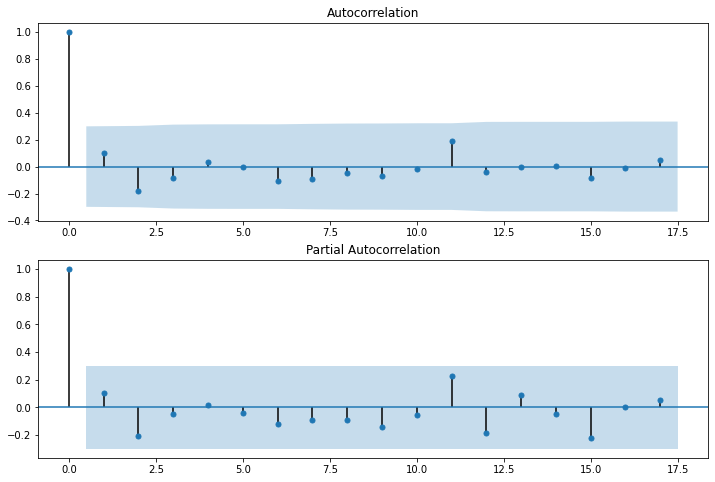

In [414]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(canada_ar_train['Canada'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(canada_ar_train['Canada'],ax=ax2)

In [419]:
model=ARIMA(canada_ar_train['Canada'],order=(1,1,0))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [420]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Canada   No. Observations:                   42
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -104.224
Method:                       css-mle   S.D. of innovations              2.889
Date:                Wed, 15 Jun 2022   AIC                            214.448
Time:                        18:29:22   BIC                            219.661
Sample:                    01-01-1981   HQIC                           216.358
                         - 01-01-2022                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0624      0.333      0.187      0.853      -0.591       0.716
ar.L1.D.Canada    -0.3457      0.143     -2.423      0.020      -0.625      -0.066
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8930           +0.0000j            2.8930            0.5000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


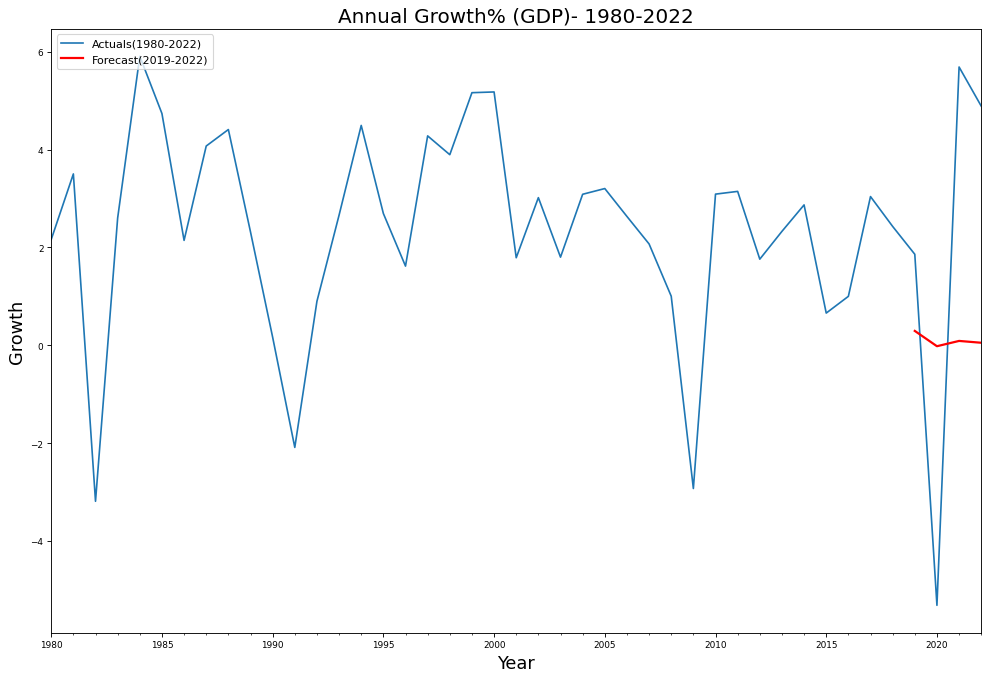

In [421]:
canada_ar_train['forecast'] = 'NaN'
canada_ar_train['forecast']=model_fit.predict(start=39,end=43,dynamic=True)

# Plot Data
fig = plt.figure(dpi=80, figsize=(15,10))
plt.title("Annual Growth% (GDP)- 1980-2022", fontsize=18)
canada_ar_train['Canada'].plot( label="Actuals(1980-2022)")
canada_ar_train['forecast'].plot(linewidth=2, c='red', label="Forecast(2019-2022)")
plt.xlabel('Year', fontsize=16)
plt.ylabel("Growth", fontsize=16)
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [422]:
from pandas.tseries.offsets import DateOffset
future_dates=[canada_ar_train.index[-1]+ DateOffset(months=x)for x in [12,24]]

In [423]:
future_dates

[Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')]

In [424]:
future_pred_df = pd.DataFrame(index=future_dates[:],columns=canada_ar_train.columns)

In [425]:
future_pred_df

,Canada,forecast
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN


In [426]:
future_df=pd.concat([canada_ar_train,future_pred_df])

In [427]:
future_df['forecast']

1980-01-01         NaN
1981-01-01         NaN
1982-01-01         NaN
1983-01-01         NaN
1984-01-01         NaN
1985-01-01         NaN
1986-01-01         NaN
1987-01-01         NaN
1988-01-01         NaN
1989-01-01         NaN
1990-01-01         NaN
1991-01-01         NaN
1992-01-01         NaN
1993-01-01         NaN
1994-01-01         NaN
1995-01-01         NaN
1996-01-01         NaN
1997-01-01         NaN
1998-01-01         NaN
1999-01-01         NaN
2000-01-01         NaN
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2004-01-01         NaN
2005-01-01         NaN
2006-01-01         NaN
2007-01-01         NaN
2008-01-01         NaN
2009-01-01         NaN
2010-01-01         NaN
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01         NaN
2016-01-01         NaN
2017-01-01         NaN
2018-01-01         NaN
2019-01-01    0.294771
2020-01-01   -0.017979
2021-01-01    0.090129
2022-01-01    0.052759
2023-01-01 

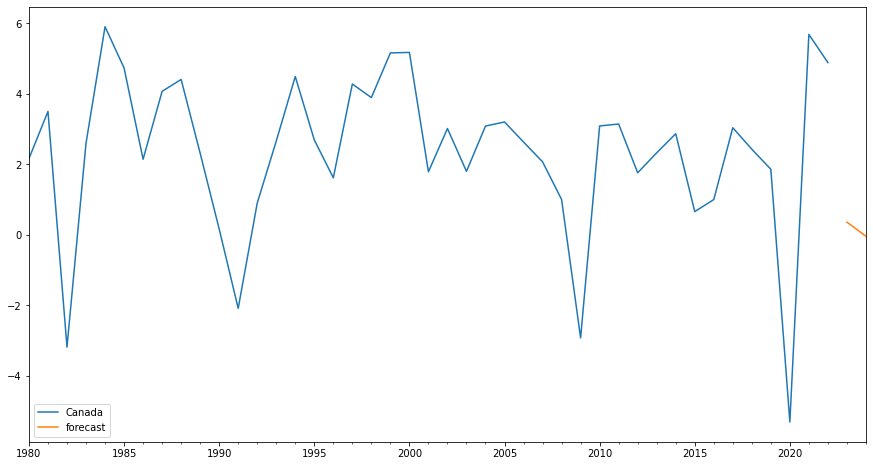

In [428]:
future_df['forecast'] = model_fit.predict(start = 43, end = 45, dynamic= True)  
future_df[['Canada', 'forecast']].plot(figsize=(15, 8)) 

# XGBOOST 